<p>
    Nama: Frendy Sanusi<br>
    NIM: 18221041<br>
    Kelompok: 12<br>
    Subtopik: Prediksi Harga Mobil Bekas dengan Model Regresi<br>
    Link dataset: <a href='https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data'>Dataset</a>
</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
file = 'train-data.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Metadata
1. <strong>Name</strong>: nama merk mobil
2. <strong>Location</strong>: lokasi tempat mobil tersedia untuk dijual
3. <strong>Year</strong>: tahun atau edisi keluarnya mobil
4. <strong>Kilometers_Driven</strong>: jarak yang ditempuh mobil ketika sedang dimiliki oleh pemilik terdahulu (dalam satuan kilometer)
5. <strong>Fuel_Type</strong>: jenis bahan bakar yang digunakan mobil (Diesel, Petrol, CNG, LPG, atau Electric)
6. <strong>Transmission</strong>: jenis transmisi yang digunakan mobil (Automatic atau Manual)
7. <strong>Owner_Type</strong>: jenis pemilik mobil (Firsthand, Secondhand, Thirdhand, atau Fourthhand dan seterusnya)
8. <strong>Mileage</strong>: standar tempuh yang ditawarkan perusahaan (dalam satuan kmpl atau km/kg)
9. <strong>Engine</strong>: volume silinder mesin (dalam satuan CC)
10. <strong>Power</strong>: daya maksimum mesin (dalam satuan bhp)
11. <strong>Seats</strong>: jumlah tempat duduk pada mobil
12. <strong>New_Price</strong>: harga mobil yang memiliki merk yang sama
13. <strong>Price</strong>: harga mobil bekas (dalam satuan INR Lakhs)

In [4]:
# Menghapus atribut yang tidak memiliki makna yang penting
df = df.drop("Unnamed: 0", axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [5]:
# Size of data
print(f'Jumlah record: {df.shape[0]}')
print(f'Jumlah atribut: {df.shape[1]}')

Jumlah record: 6019
Jumlah atribut: 13


In [6]:
# List of Attribute
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [7]:
# Kilometers_Driven data count
df['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3093, dtype: int64

In [8]:
# Seats data count
df['Seats'].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [9]:
# Price data count
df['Price'].value_counts()

Price
4.50     88
5.50     84
3.50     82
4.25     73
3.25     71
         ..
11.62     1
43.60     1
19.05     1
3.94      1
7.43      1
Name: count, Length: 1373, dtype: int64

# Data Quality

In [10]:
# Check if there are missing values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
# Check if there are duplicated values
df.duplicated().sum()

0

In [12]:
# Check if there are non-unique values
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [13]:
for col in df.columns:
    print(df[col].value_counts())
    print()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64

Kilometers_Driven
60000    8

Dari sini diketahui bahwa terdapat 5 atribut yang seharusnya bertipe kategorikal:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Seats

In [14]:
# Change the data type into categorical
cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
for col in cols:
    df[col] = df[col].astype('category')

In [15]:
df.dtypes

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                category
New_Price              object
Price                 float64
dtype: object

# Data Cleansing & Feature Engineering for Statistics Needs

In [16]:
# Drop all records that have null values
# Data with null value in 'New_Price' will not be dropped because the null values from this attribute are too much
df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True)
df = df.reset_index(drop=True)

# Drop attribute 'New_Price' because we don't need it
df.drop('New_Price', axis=1, inplace=True)

In [17]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [18]:
# Size of data after cleansing
df.shape

(5975, 12)

In [19]:
# Get the numeric value from each data in Mileage, Engine, and Power
# Get the company name from each data in Name
for i in range(df.shape[0]):
    df.at[i, 'Mileage'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine'] = df['Engine'][i].split()[0]
    df.at[i, 'Power'] = df['Power'][i].split()[0]
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Name'] = ' '.join(df['Name'][i].split()[1:])

# Change the data type
df['Mileage'] = df['Mileage'].astype('float')
df['Engine'] = df['Engine'].astype('float')
df['Company'] = df['Company'].astype('category')

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,Hyundai
2,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,Honda
3,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,Audi


In [21]:
df['Power'].sort_values()

2447     100
466      100
1731     100
5884     100
3688     100
        ... 
1546    null
143     null
1848    null
5604    null
1138    null
Name: Power, Length: 5975, dtype: object

In [22]:
# Masih terdapat nilai 'null' pada atribut Power sehingga akan dilakukan filtering lagi.
df = df[df['Power'] != 'null']

# Change the data type
df['Power'] = df['Power'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5872 non-null   object  
 1   Location           5872 non-null   category
 2   Year               5872 non-null   int64   
 3   Kilometers_Driven  5872 non-null   int64   
 4   Fuel_Type          5872 non-null   category
 5   Transmission       5872 non-null   category
 6   Owner_Type         5872 non-null   category
 7   Mileage            5872 non-null   float64 
 8   Engine             5872 non-null   float64 
 9   Power              5872 non-null   float64 
 10  Seats              5872 non-null   category
 11  Price              5872 non-null   float64 
 12  Company            5872 non-null   category
dtypes: category(6), float64(4), int64(2), object(1)
memory usage: 404.0+ KB


Terlihat bahwa data setelah dilakukan filtering menjadi berjumlah 5872.

In [24]:
# Get some statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.00,2012.0000,2014.00,2016.00,2019.00
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.00
Mileage,5872.0,18.277839,4.365657,0.00,15.2600,18.20,21.10,33.54
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.10,560.00
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.00,160.00


In [25]:
# Check if there are outliers
for i in df.columns:
    if (df[i].dtypes in ['int64', 'float64']):
        print(f'Attribute "{i}": {df[i].dtypes}')
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        print(f'Q1: {q1}')
        print(f'Q3: {q3}')
        IQR = q3-q1
        print(f'IQR: {IQR}')
        mins = df[i].min()
        maxs = df[i].max()
        min_IQR = q1-1.5*IQR
        max_IQR = q3+1.5*IQR
        if (mins < min_IQR):
            print('Low outlier is found')
        if (maxs > max_IQR):
            print('High outlier is found')
        
        print('The outlier size:', df[(df[i] < min_IQR) | (df[i] > max_IQR)].shape)
        print()

Attribute "Year": int64
Q1: 2012.0
Q3: 2016.0
IQR: 4.0
Low outlier is found
The outlier size: (105, 13)

Attribute "Kilometers_Driven": int64
Q1: 33422.5
Q3: 72402.75
IQR: 38980.25
High outlier is found
The outlier size: (199, 13)

Attribute "Mileage": float64
Q1: 15.26
Q3: 21.1
IQR: 5.840000000000002
Low outlier is found
High outlier is found
The outlier size: (43, 13)

Attribute "Engine": float64
Q1: 1198.0
Q3: 1991.0
IQR: 793.0
High outlier is found
The outlier size: (58, 13)

Attribute "Power": float64
Q1: 75.0
Q3: 138.1
IQR: 63.099999999999994
High outlier is found
The outlier size: (238, 13)

Attribute "Price": float64
Q1: 3.5175
Q3: 10.0
IQR: 6.4825
High outlier is found
The outlier size: (712, 13)



In [26]:
# List attribute that has numerical data type
num_cols = ['Year', 'Kilometers_Driven', 'Price', 'Mileage', 'Engine', 'Power']

# See correlation for each data
df[num_cols].corr()

,Year,Kilometers_Driven,Price,Mileage,Engine,Power
Year,1.000000,-0.169369,0.299475,0.285623,-0.068045,0.014531
Kilometers_Driven,-0.169369,1.000000,-0.008249,-0.060608,0.093030,0.033490
Price,0.299475,-0.008249,1.000000,-0.341652,0.658047,0.772843
Mileage,0.285623,-0.060608,-0.341652,1.000000,-0.637258,-0.538844
Engine,-0.068045,0.093030,0.658047,-0.637258,1.000000,0.866301
Power,0.014531,0.033490,0.772843,-0.538844,0.866301,1.000000


# Data Visualization

In [27]:
colors = sns.color_palette("pastel")
sns.set_palette(colors)

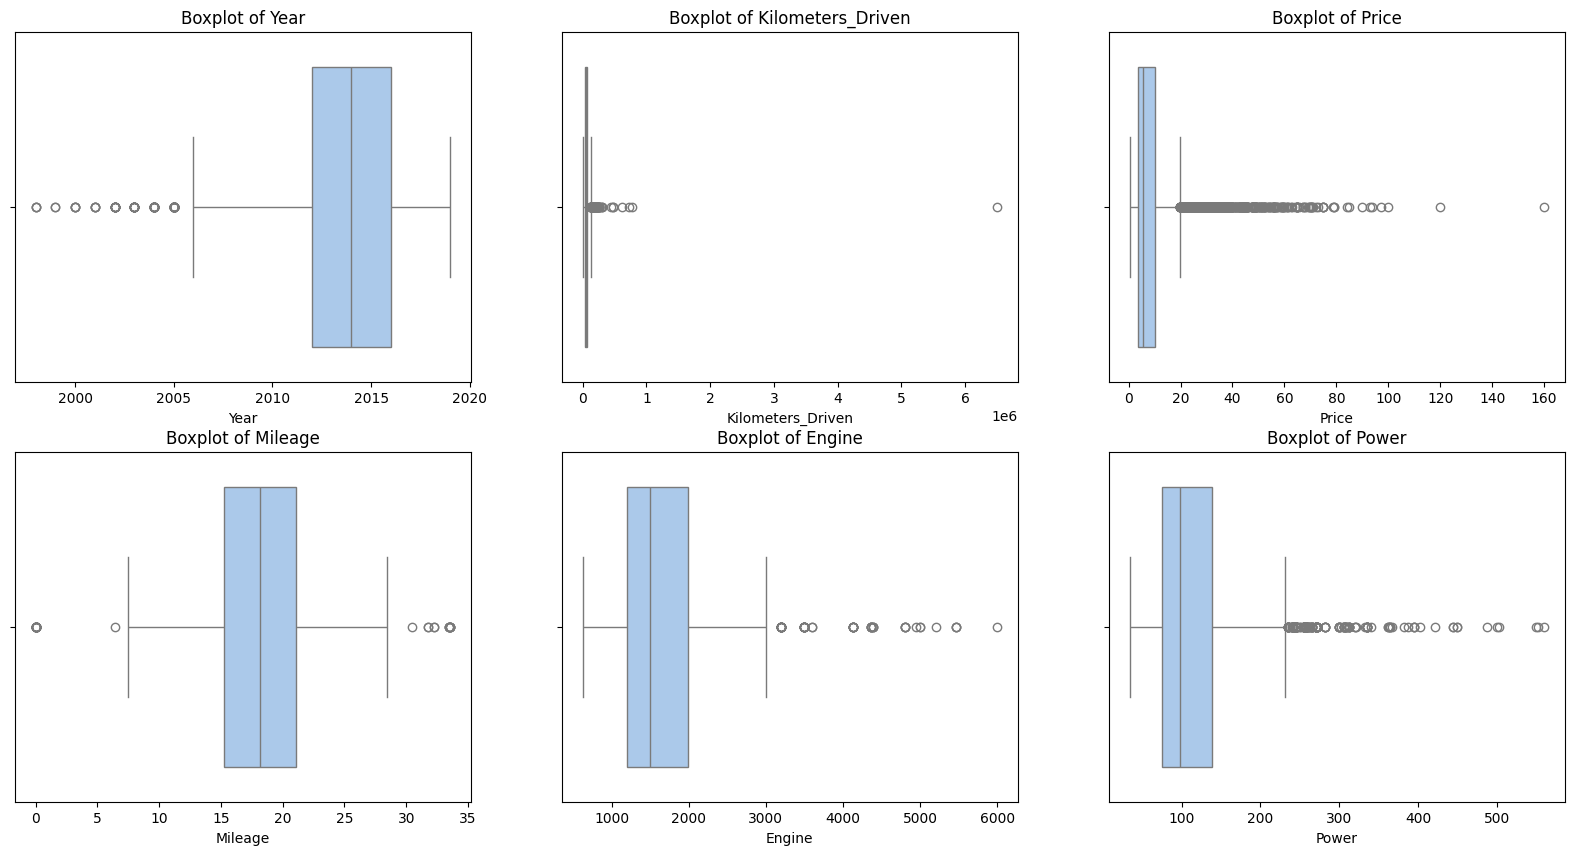

In [28]:
# Boxplot for numerical attributes
ncols = 3
fig, axs = plt.subplots(nrows = int(np.ceil(len(num_cols)/ncols)), ncols = ncols, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < len(num_cols):
        sns.boxplot(df[num_cols[i]], orient='h', ax=ax)
        ax.set_title(f'Boxplot of {num_cols[i]}')
    else:
        ax.axis('off')

Dari visualiasi tersebut diperoleh:
1. Terdapat 1 data outlier pada atribut 'Kilometers_Driven' yang sangat jauh dari outlier lainnya.
2. Terdapat 1 data outlier pada atribut 'Price' yang jauh dari outlier lainnya.
3. Terdapat beberapa data outlier pada atribut 'Mileage' yang bernilai 0.
4. Terdapat beberapa data outlier pada atribut 'Power' yang bernilai lebih dari 488.

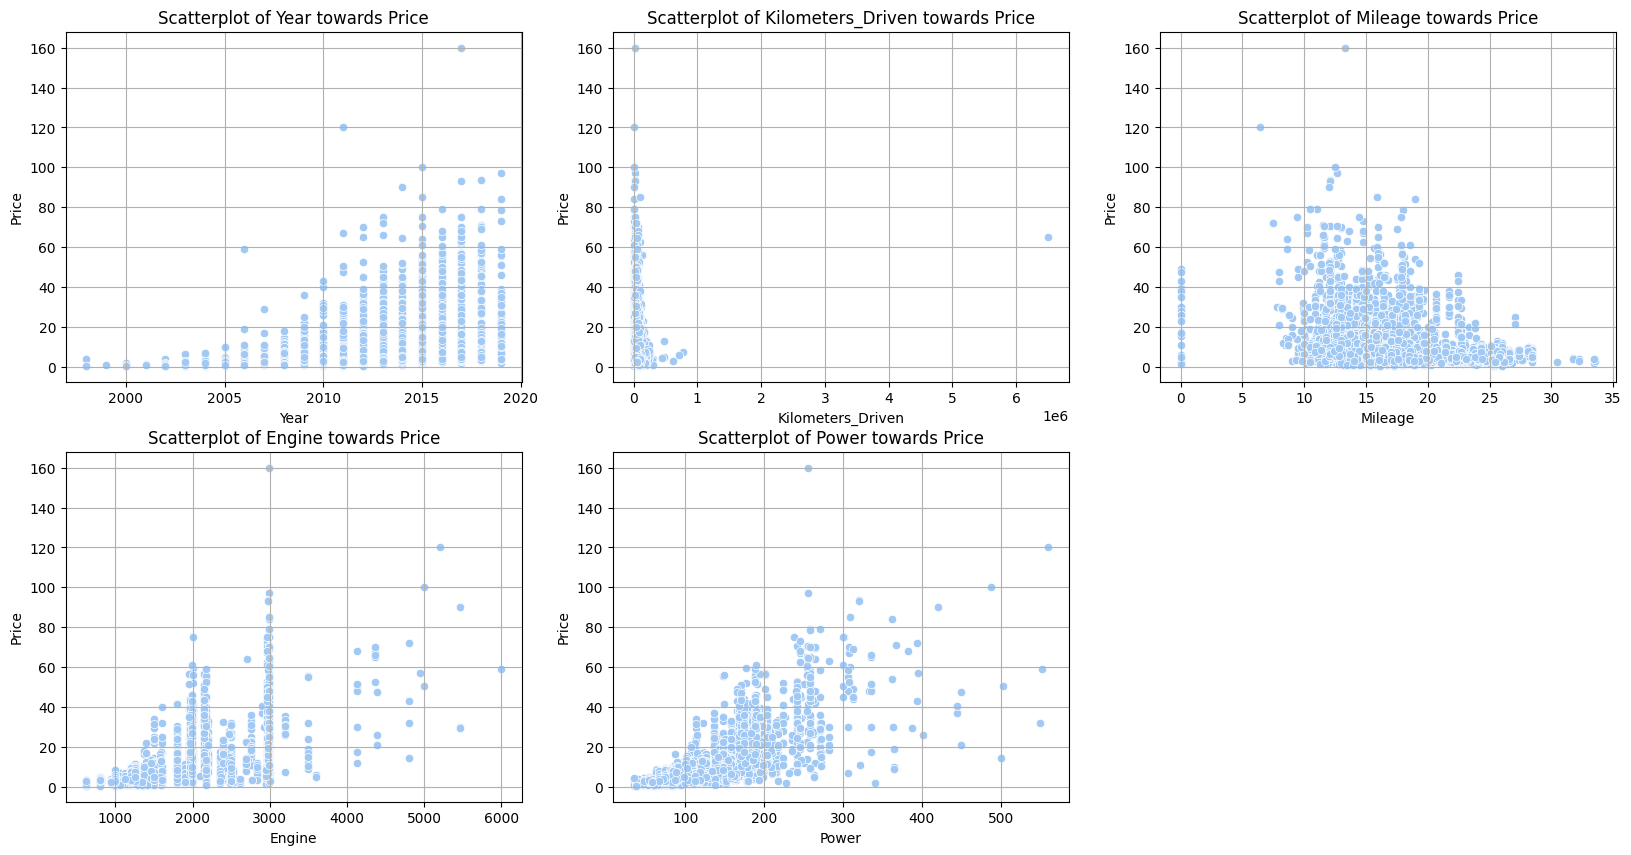

In [29]:
# Scatterplot for numerical attributes towards Price
ncols = 3
num_cols_plot = [col for col in num_cols if col != 'Price']
fig, axs = plt.subplots(nrows = int(np.ceil(len(num_cols_plot)/ncols)), ncols = ncols, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < len(num_cols_plot):
        sns.scatterplot(x=df[num_cols_plot[i]], y=df['Price'], ax=ax)
        ax.set_title(f'Scatterplot of {num_cols_plot[i]} towards Price')
        ax.grid()
    else:
        ax.axis('off')

Dari visualisasi tersebut diperoleh bahwa atribut 'Engine' dan atribut 'Power' memiliki hubungan liner dengan atribut harga (Price).

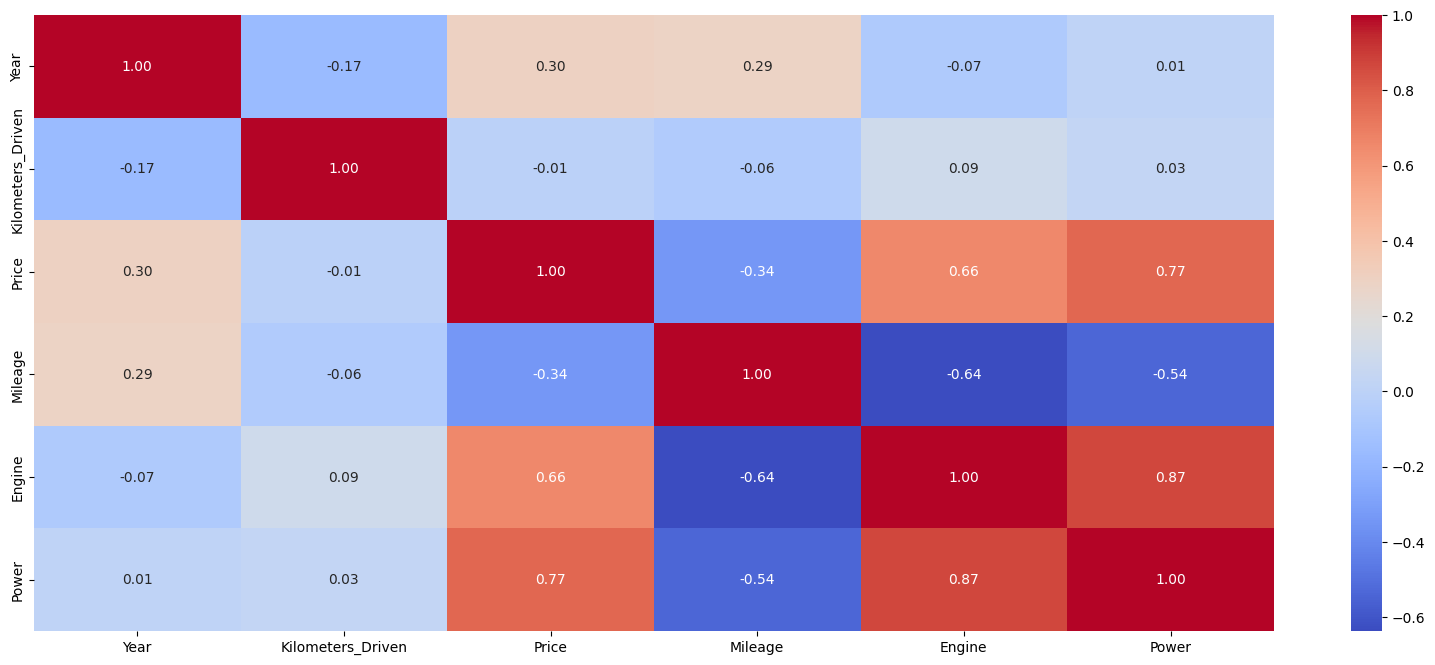

In [30]:
# Heatmap for visualizing the correlation among each numeric attributes
plt.figure(figsize=(20, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Dari visualisasi tersebut diperoleh bahwa atribut 'Engine' dan 'Power' memiliki korelasi yang cukup tinggi dengan atribut harga.

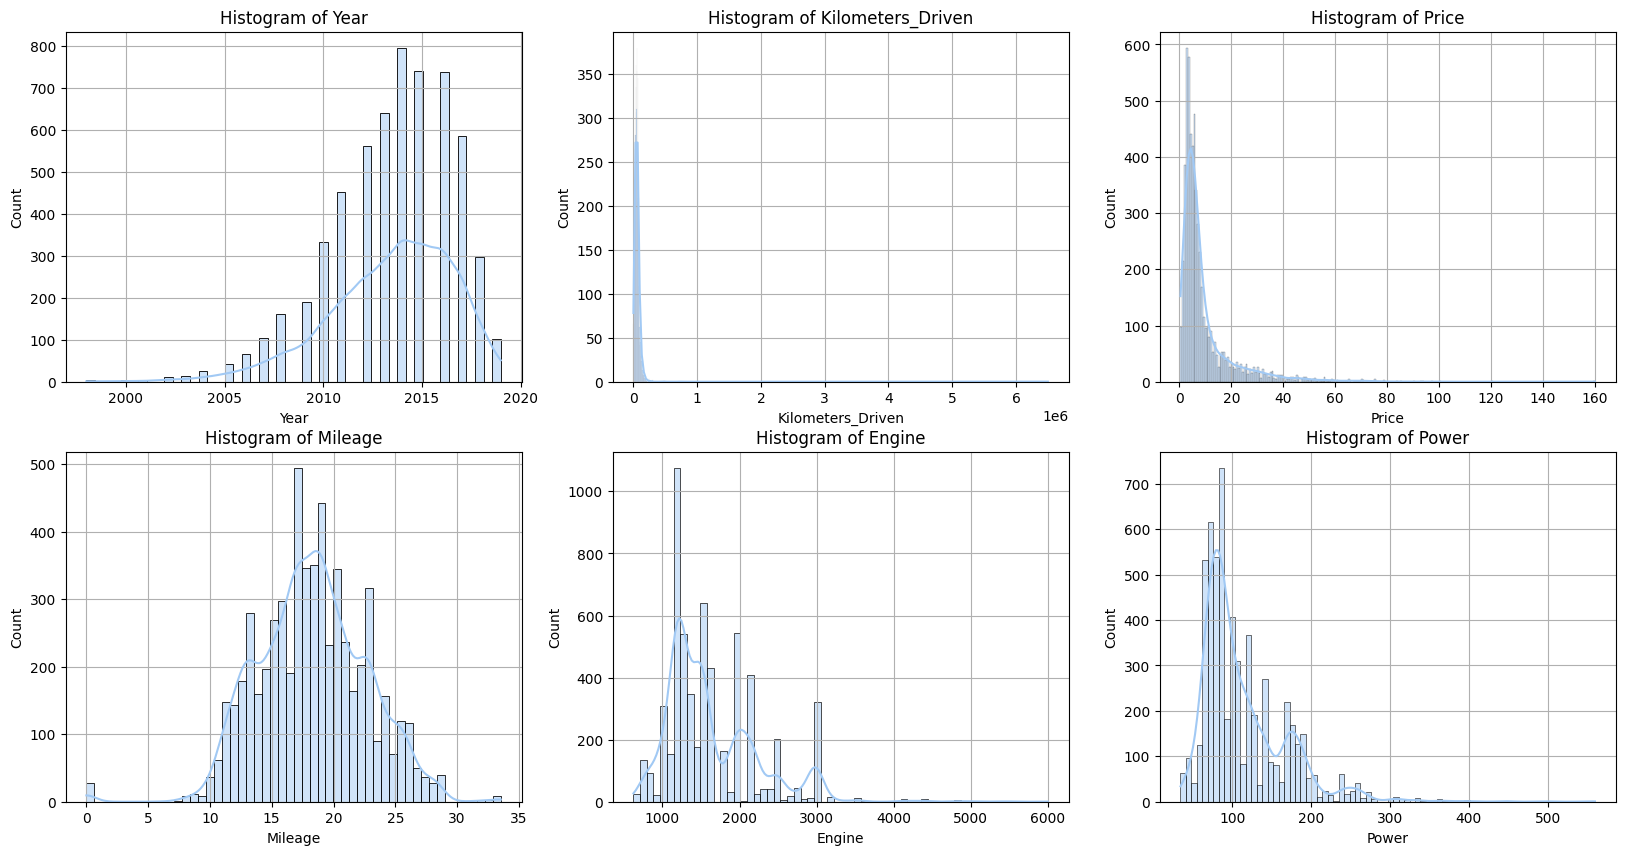

In [31]:
# Histogram for numeric attributes
ncols = 3
fig, axs = plt.subplots(nrows=int(np.ceil(len(num_cols)/ncols)), ncols=ncols, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=ax)
        ax.set_title(f'Histogram of {num_cols[i]}')
        ax.grid()
    else:
        ax.axis('off')

Dari visualisasi tersebut diperoleh beberapa insight:
1. Persebaran data pada atribut Engine mirip dengan Power
2. Persebaran data pada atribut Mileage mendekati distribusi normal
3. Pada atribut Kilometers_Driven, terdapat data yang nilainya jauh dengan mayoritas data.
4. Mayoritas mobil memiliki volume mesin di bawah 3000 CC dan daya mesin di bawah 200 bhp.
5. Mayoritas mobil memiliki mileage dengan rentang 10 hingga 28 kmpl.

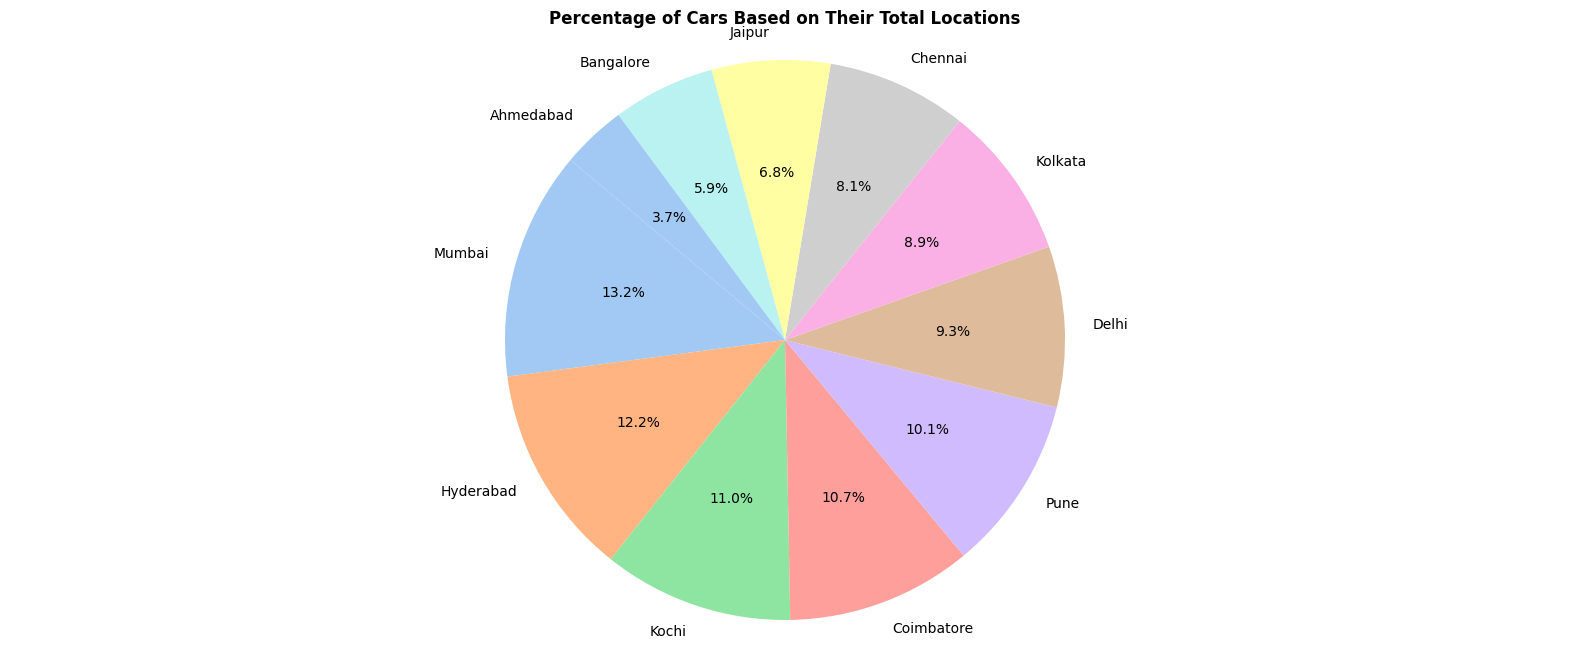

In [32]:
# Most car located
location_counts = df['Location'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(location_counts, labels=location_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Cars Based on Their Total Locations', fontweight='bold')
plt.show()

Dari visualisasi tersebut diperoleh bahwa mobil paling banyak dijual/tersedia di kota Mumbai, Hyderabad, dan Coimbatore.

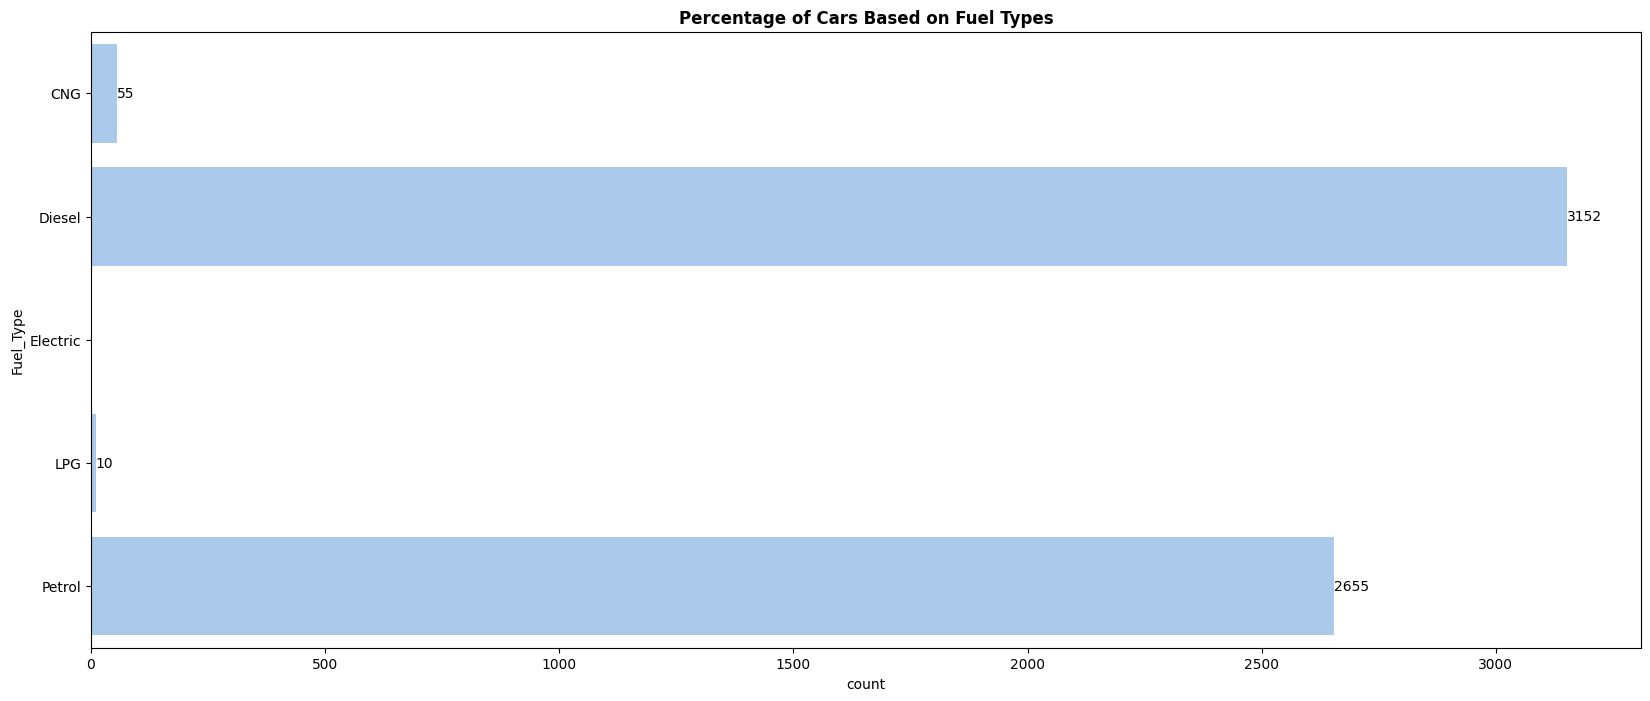

In [33]:
# Fuel types used by cars
plt.figure(figsize=(20, 8))
ax = sns.countplot(df['Fuel_Type'])
ax.bar_label(ax.containers[0])
plt.title('Percentage of Cars Based on Fuel Types', fontweight='bold')
plt.show()

Dari visualisasi tersebut diperoleh bahwa mobil paling banyak memiliki jenis bahan bakan 'Diesel' dan diikuti 'Petrol'. Tidak ada mobil bekas yang memiliki bahan bakar elektrik.

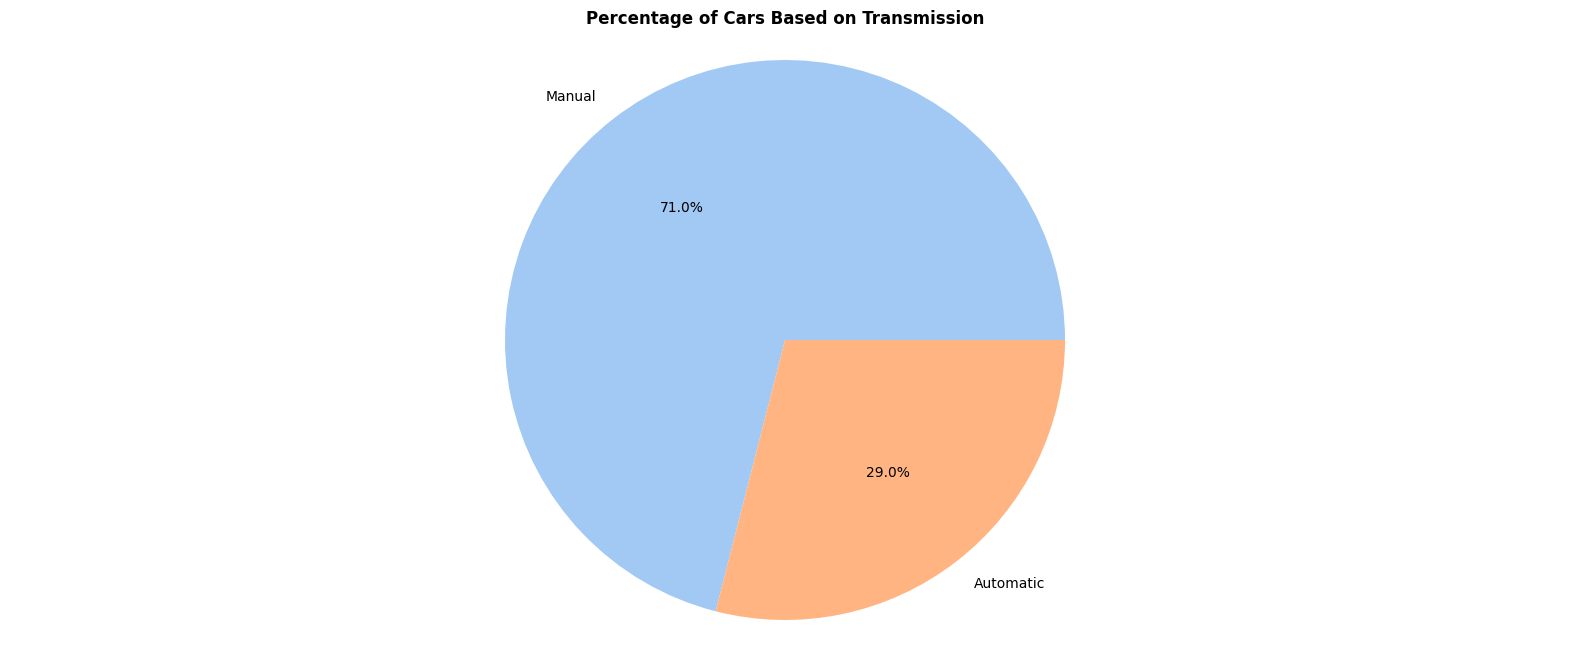

In [34]:
# Transmission used by cars
transmission_counts = df['Transmission'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Cars Based on Transmission', fontweight='bold')
plt.show()

Dari visualisasi tersebut diperoleh bahwa mayoritas mobil memiliki transmisi manual.

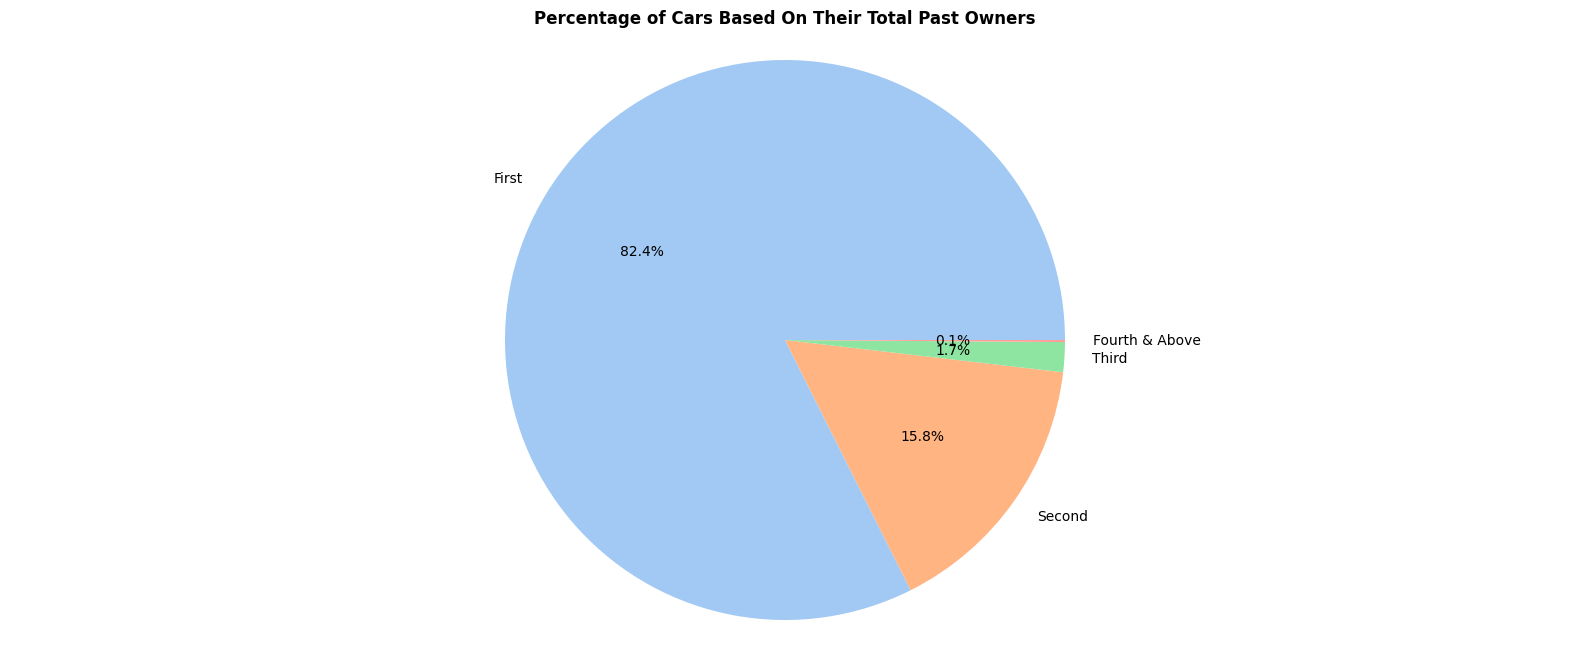

In [35]:
# Past owner counts
owner_counts = df['Owner_Type'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(owner_counts, labels=owner_counts.index, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Cars Based On Their Total Past Owners', fontweight='bold')
plt.show()

Dari visualisasi tersebut diperoleh bahwa mobil bekas yang tersedia paling banyak hanya pernah dimiliki oleh satu orang.

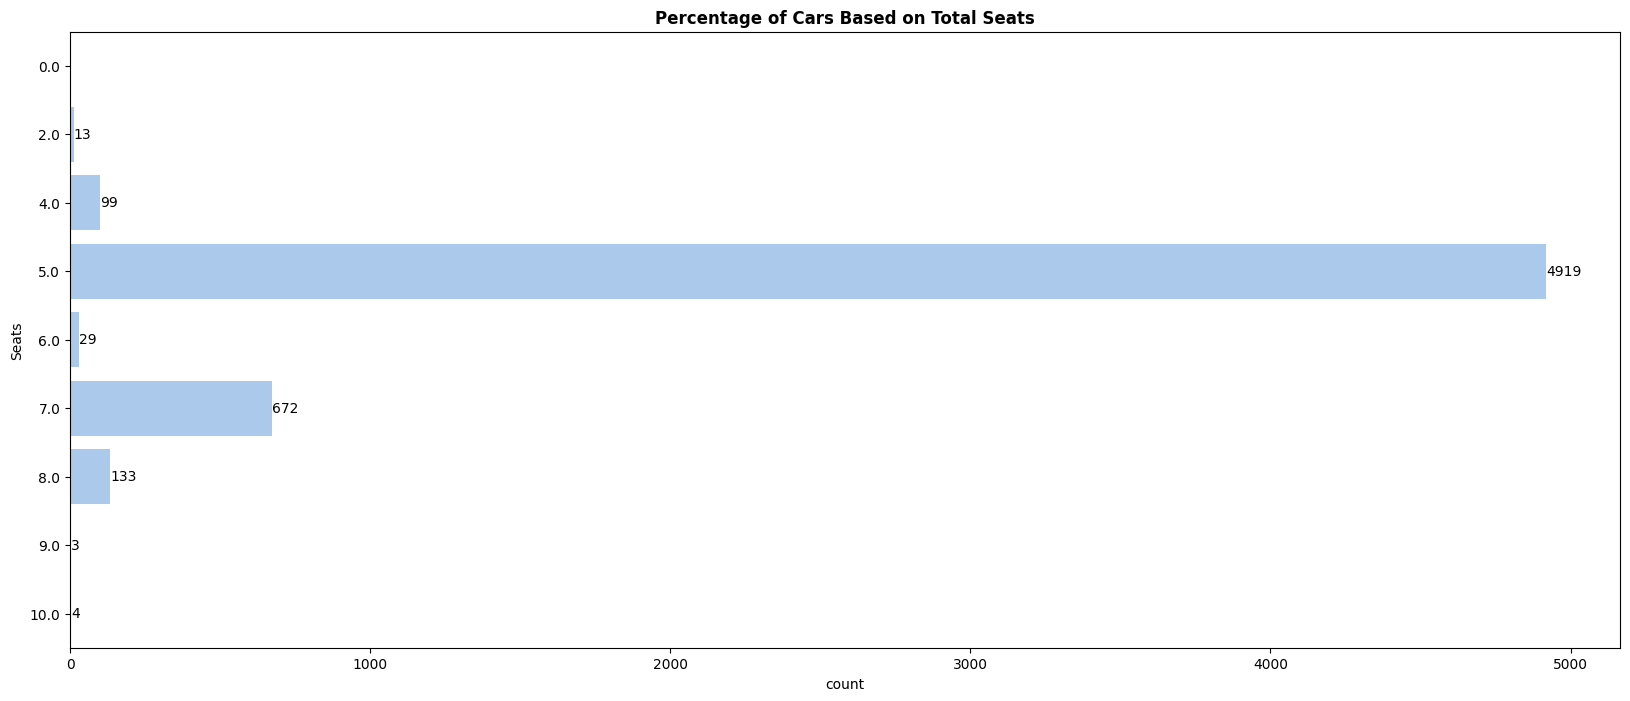

In [36]:
# Seat counts of cars
plt.figure(figsize=(20, 8))
ax = sns.countplot(df['Seats'])
ax.bar_label(ax.containers[0])
plt.title('Percentage of Cars Based on Total Seats', fontweight='bold')
plt.show()

Dari visualisasi tersebut diperoleh bahwa mobil bekas yang tersedia didominasi oleh mobil dengan tempat duduk berjumlah 5 buah.

# Data Preparation & Modelling

In [37]:
df.dtypes

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                category
Price                 float64
Company              category
dtype: object

In [38]:
# Label encoding for categorical attributes
for col in df.columns:
    if (df[col].dtypes == 'category'):
        df[col+'_Cat'] = df[col].cat.codes

In [39]:
# Drop outliers
df.drop(df[df['Kilometers_Driven'] == 6500000].index, inplace=True)
df.drop(df[df['Price'] >= 120].index, inplace=True)
df.drop(df[df['Mileage'] == 0].index, inplace=True)
df.drop(df[df['Power'] >= 488].index, inplace=True)

In [40]:
df.shape

(5836, 19)

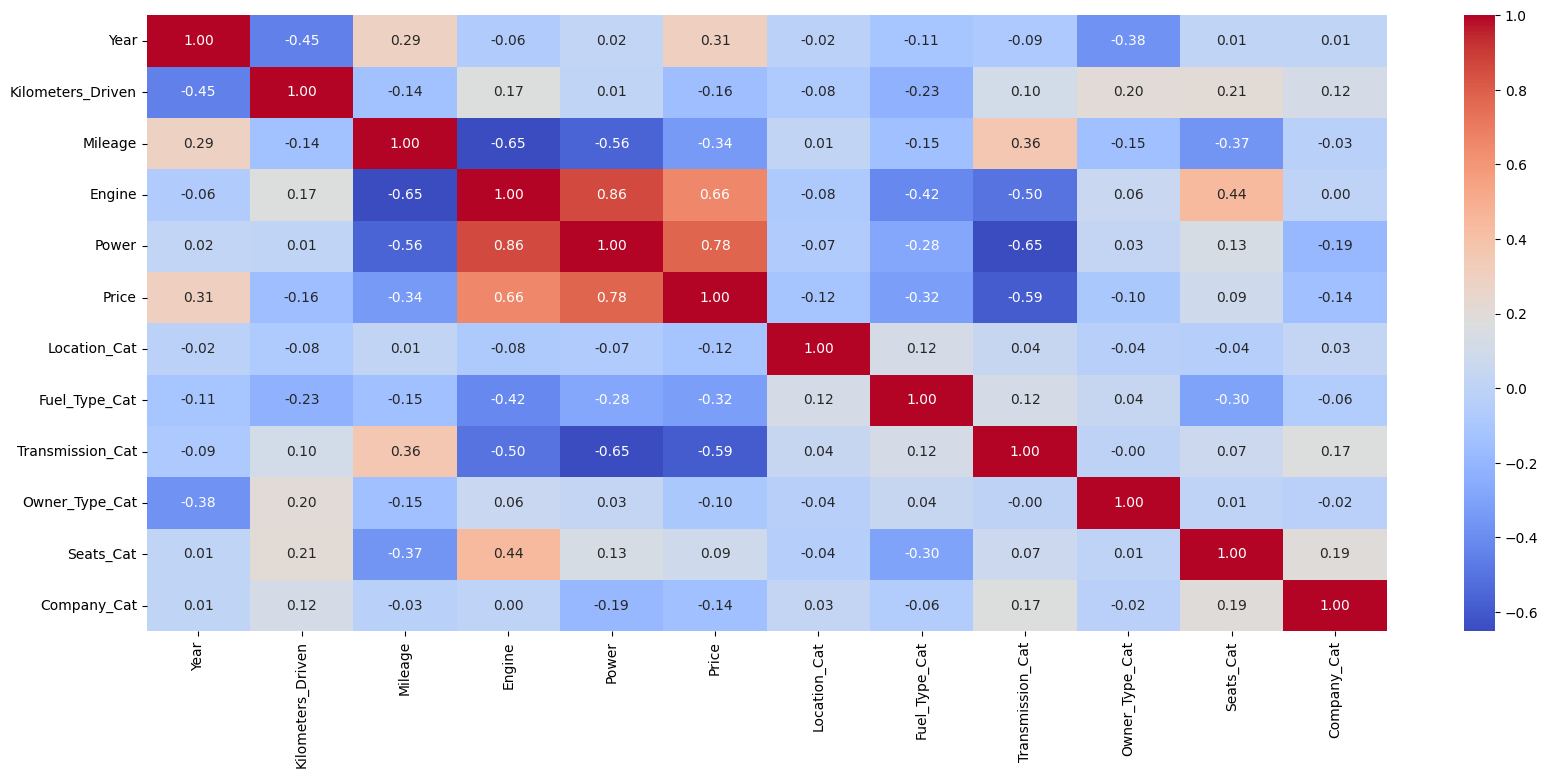

In [41]:
# Heatmap for visualizing the correlation among each numeric attributes
num_cols = [col for col in df.columns if df[col].dtypes in ['int8', 'int64', 'float64']]
plt.figure(figsize=(20, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [42]:
# Select independent features
X = df[['Year', 'Mileage', 'Engine', 'Power', 'Fuel_Type_Cat', 'Transmission_Cat']]
y = df[['Price']]

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4668, 6)
X_test shape: (1168, 6)
y_train shape: (4668, 1)
y_test shape: (1168, 1)


In [44]:
mae_score_list, mse_score_list, rmse_score_list, r2_test_score_list, r2_train_score_list = (list() for _ in range(5))

In [45]:
def evaluate(y_pred, y_train_pred):
    mae_score = mean_absolute_error(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mse_score)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mae_score_list.append(mae_score)
    mse_score_list.append(mse_score)
    rmse_score_list.append(rmse_score)
    r2_test_score_list.append(r2_test)
    r2_train_score_list.append(r2_train)
    
    print('Mean Absolute Error: %.4f' % mae_score)
    print('Mean Squared Error: %.4f' % mse_score)
    print('Root Mean Squared Error: %.4f' % rmse_score)
    print('R2-score test: %.4f' % r2_test)
    print('R2-score train: %.4f' % r2_train)

In [46]:
def visualize(y_pred):    
    plt.figure(figsize=(20, 8))
    plt.scatter(y_pred, y_test)
    plt.title('Plot of Predictions vs Actual')
    plt.xlabel('Predictions')
    plt.ylabel('Actual')
    plt.show()

def residual_plot(y_pred):
    res = y_test - y_pred
    plt.figure(figsize=(20, 8))
    plt.scatter(y_pred, res)
    plt.title('Residual Plot of Predictions vs Actual')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

### Linear Regression

Coefficients: [[ 9.77320145e-01 -7.95568069e-02 -3.73921207e-04  1.40431669e-01
  -6.93429714e-01 -2.86205069e+00]]
Intercept: [-1968.37756691]

Mean Absolute Error: 3.4530
Mean Squared Error: 27.5973
Root Mean Squared Error: 5.2533
R2-score test: 0.7201
R2-score train: 0.7050


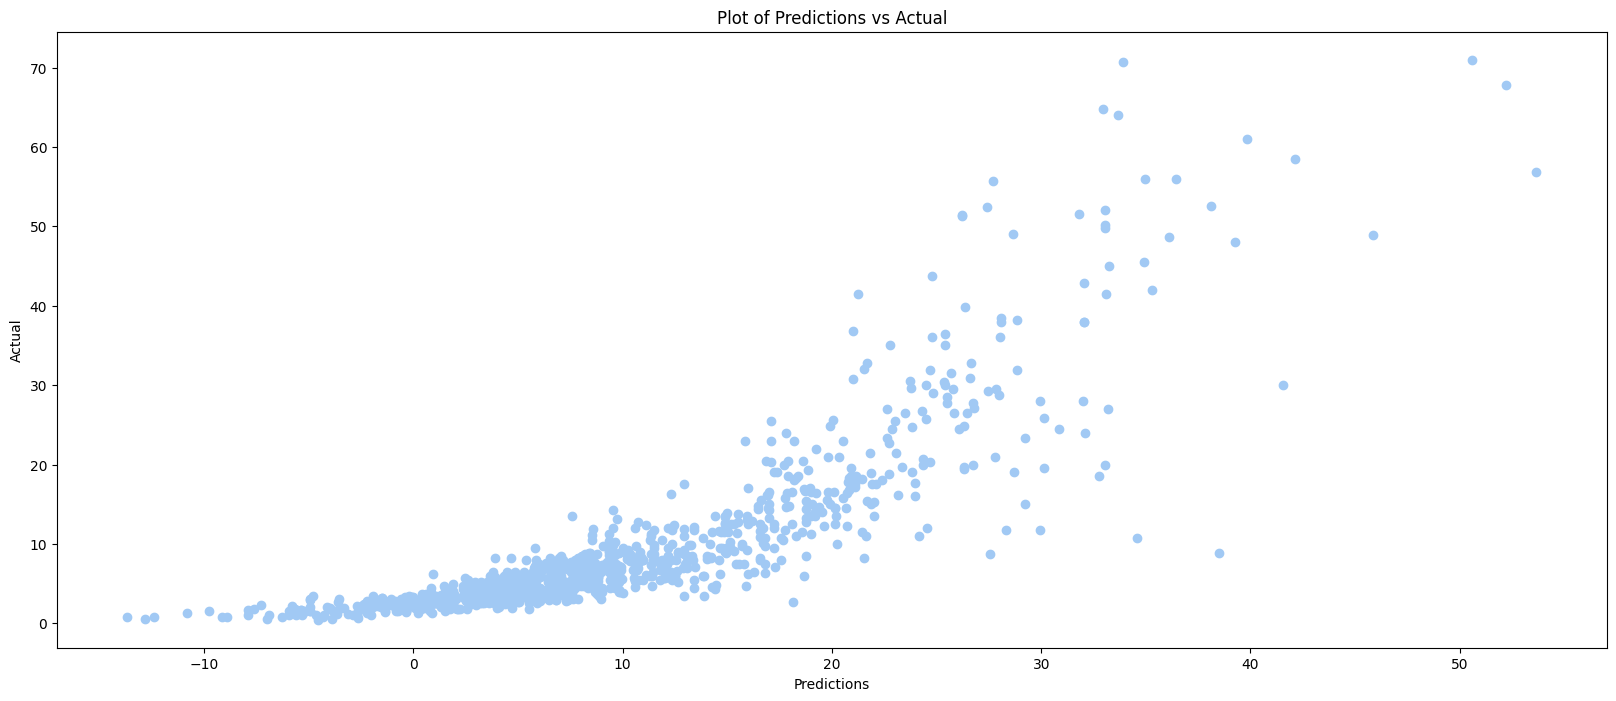

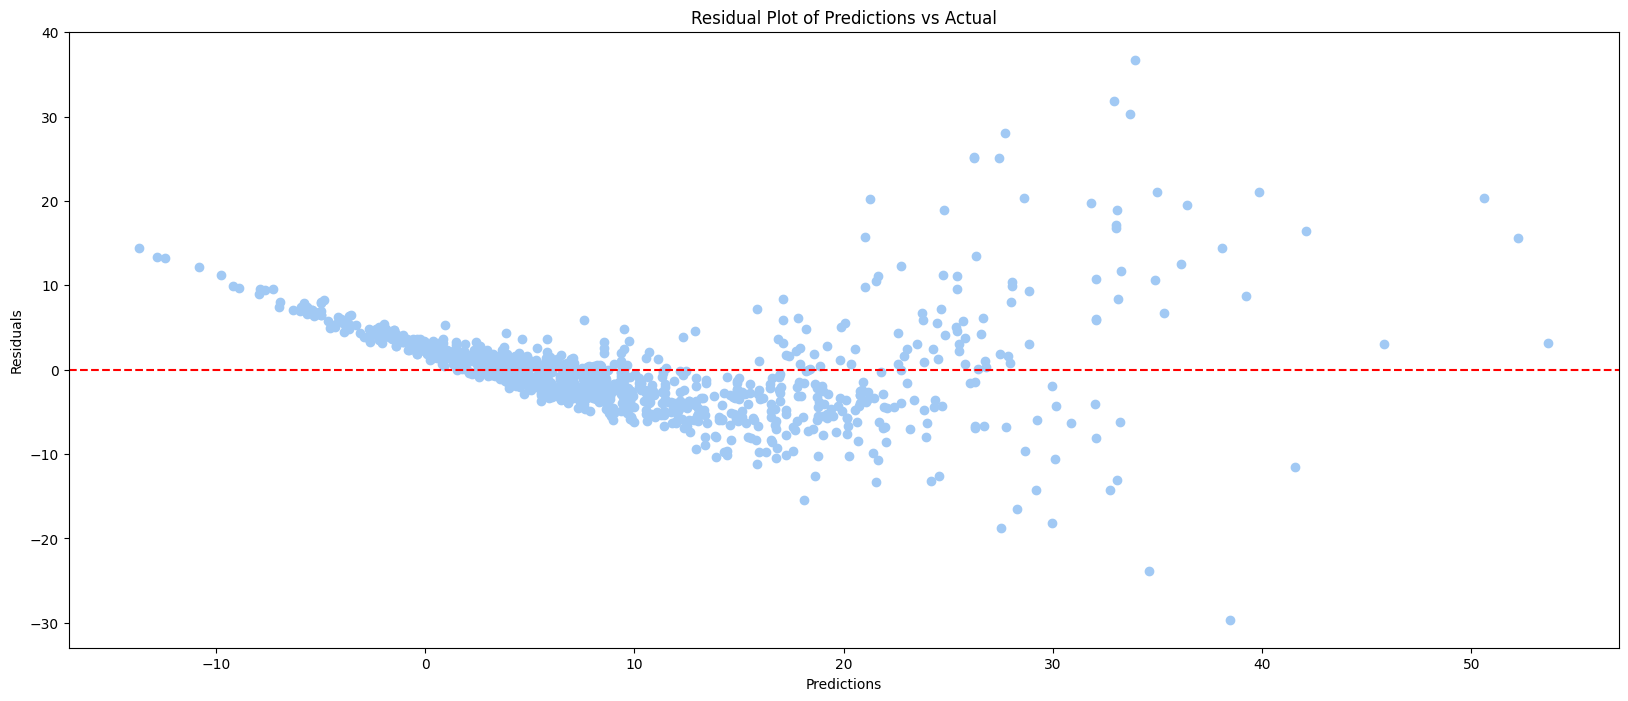

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print()
evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Polynomial Regression

Coefficients: [[ 2.79381882e-06 -5.69817674e+01 -9.05405677e+00  1.13161842e+00
  -4.49052982e+01  2.70827645e+02  3.68767527e+02  1.41834232e-02
   4.23253847e-03 -5.74784918e-04  2.25218115e-02 -1.34937132e-01
  -3.60193928e-01  1.07848533e-02  8.36512587e-04 -9.66043129e-03
   3.84151280e-02 -3.08611933e-01  2.71545699e-06 -2.38179754e-06
   5.78748958e-04  4.10297584e-03 -1.95042319e-04 -1.67630019e-02
  -1.40499090e-01  1.08528859e-01  1.64150912e-01  3.68767530e+02]]
Intercept: [57229.95102785]

Mean Absolute Error: 2.1617
Mean Squared Error: 13.7537
Root Mean Squared Error: 3.7086
R2-score test: 0.8605
R2-score train: 0.8539


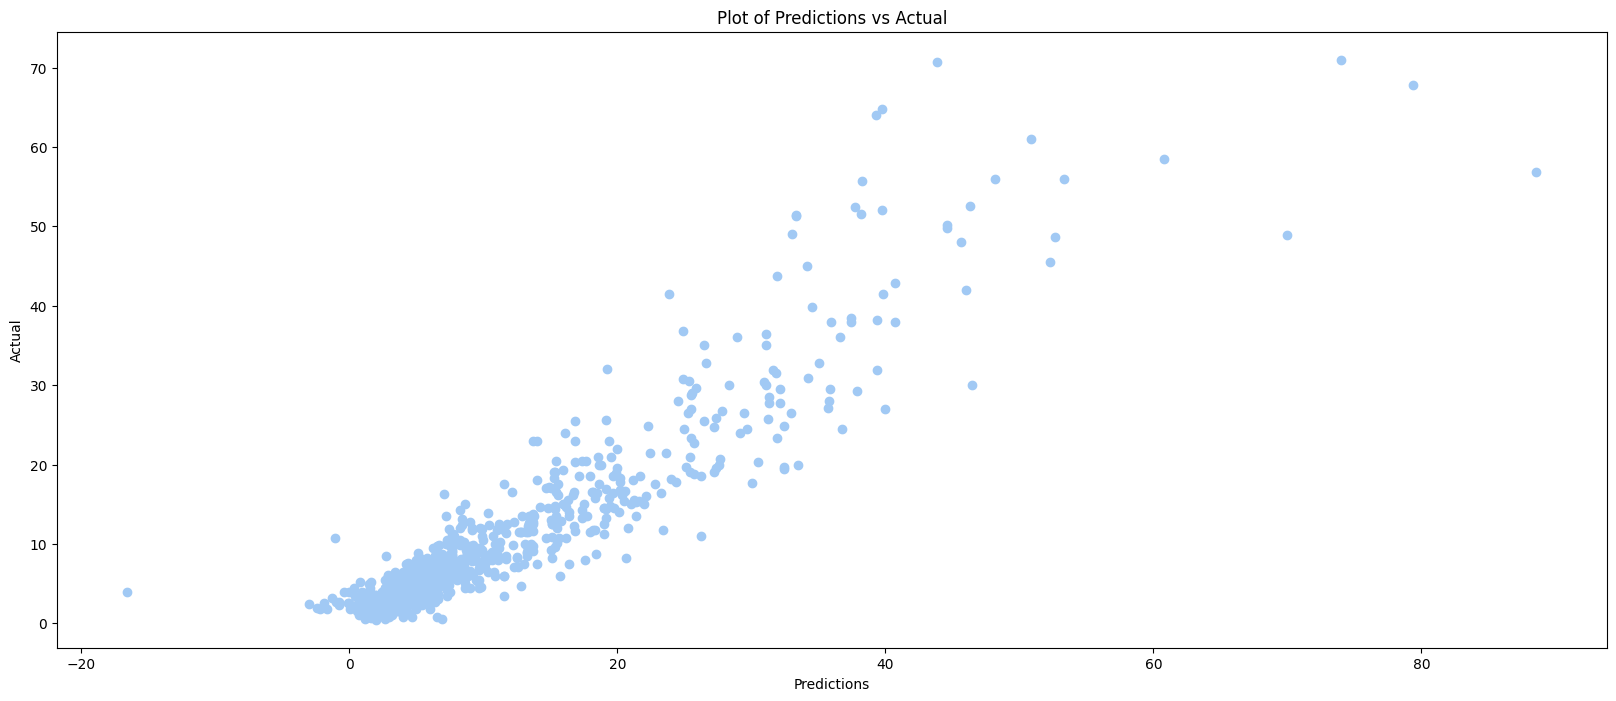

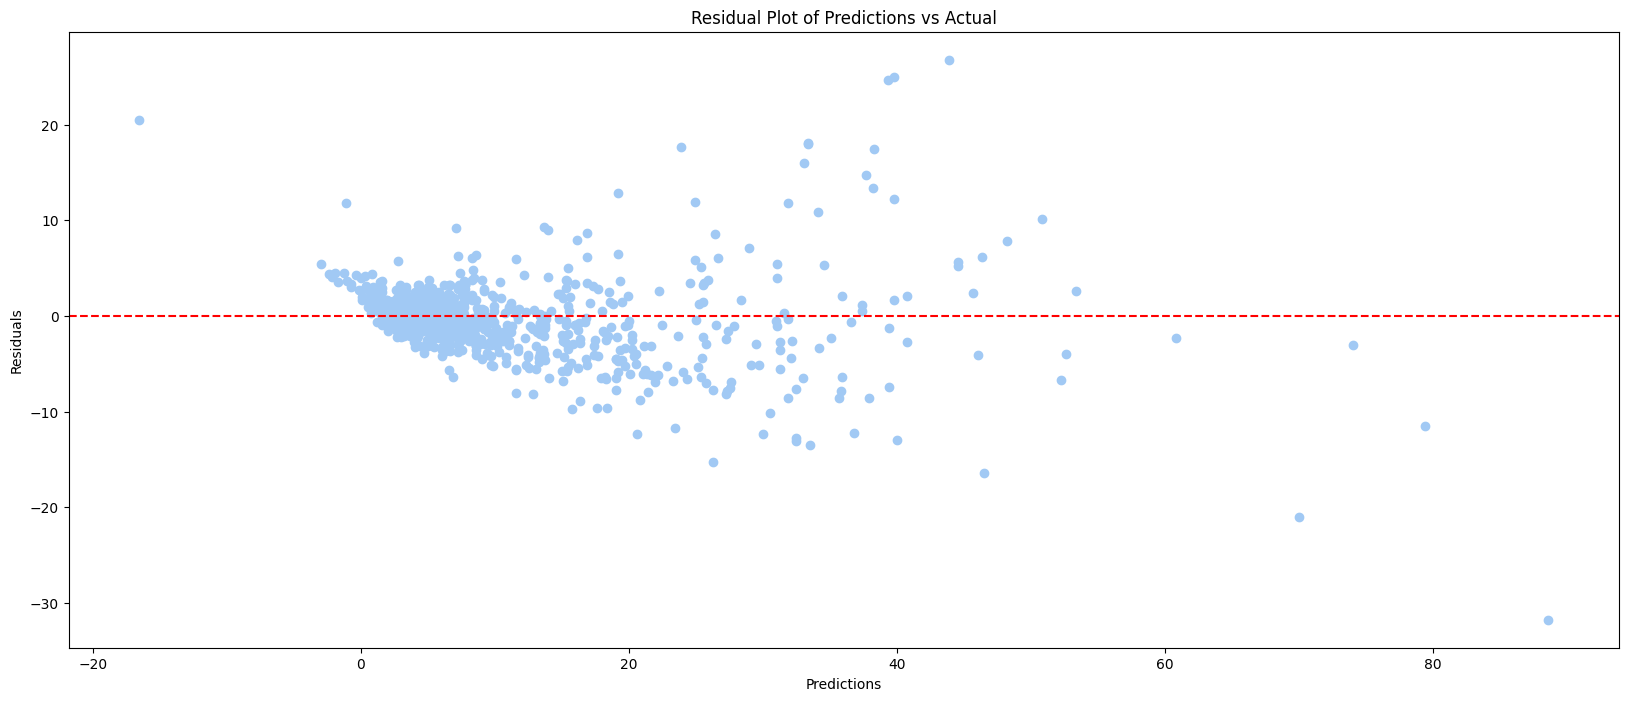

In [48]:
# Degree = 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_test))
y_train_pred = lin_reg2.predict(poly_reg.fit_transform(X_train))

print(f'Coefficients: {lin_reg2.coef_}')
print(f'Intercept: {lin_reg2.intercept_}')
print()
evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

Coefficients: [[ 2.45793041e-04 -1.15493684e+04 -1.21818006e+04 -3.79424378e+02
   5.53628698e+03 -2.84708737e+04 -2.00616418e+03  5.57326189e+00
   1.21020246e+01  3.80838279e-01 -5.57622544e+00  8.14033804e+01
   2.45817923e+01 -1.01317337e+00 -3.25052052e-01  4.37387040e+00
  -5.05276864e+00  8.08185116e+01  1.02351300e-04 -1.11004725e-02
   1.78153293e-01 -6.20366289e-01  1.40682527e-01  2.67832658e+00
   2.43871481e+01 -1.07570042e+04 -2.67058489e+04 -1.82743202e+03
  -8.95774409e-04 -3.00122287e-03 -9.55393847e-05  1.40392738e-03
  -2.02859231e-02 -1.11200729e-02  1.97004060e-04  1.59644963e-04
  -2.18653059e-03  1.21655953e-03 -8.03035090e-02 -5.79202606e-08
   5.49817742e-06 -9.47333333e-05  1.17279731e-03 -6.93402735e-05
  -1.31441609e-03 -2.43647303e-02  6.16046630e-02  1.27421364e-01
   2.17284950e+01  5.93714755e-03  8.83315597e-05  3.17141546e-04
   4.64391706e-02  1.84079198e-02  5.79922926e-07 -6.93176230e-06
   7.09930489e-04 -2.50706911e-03  6.12547992e-05 -2.90013049e

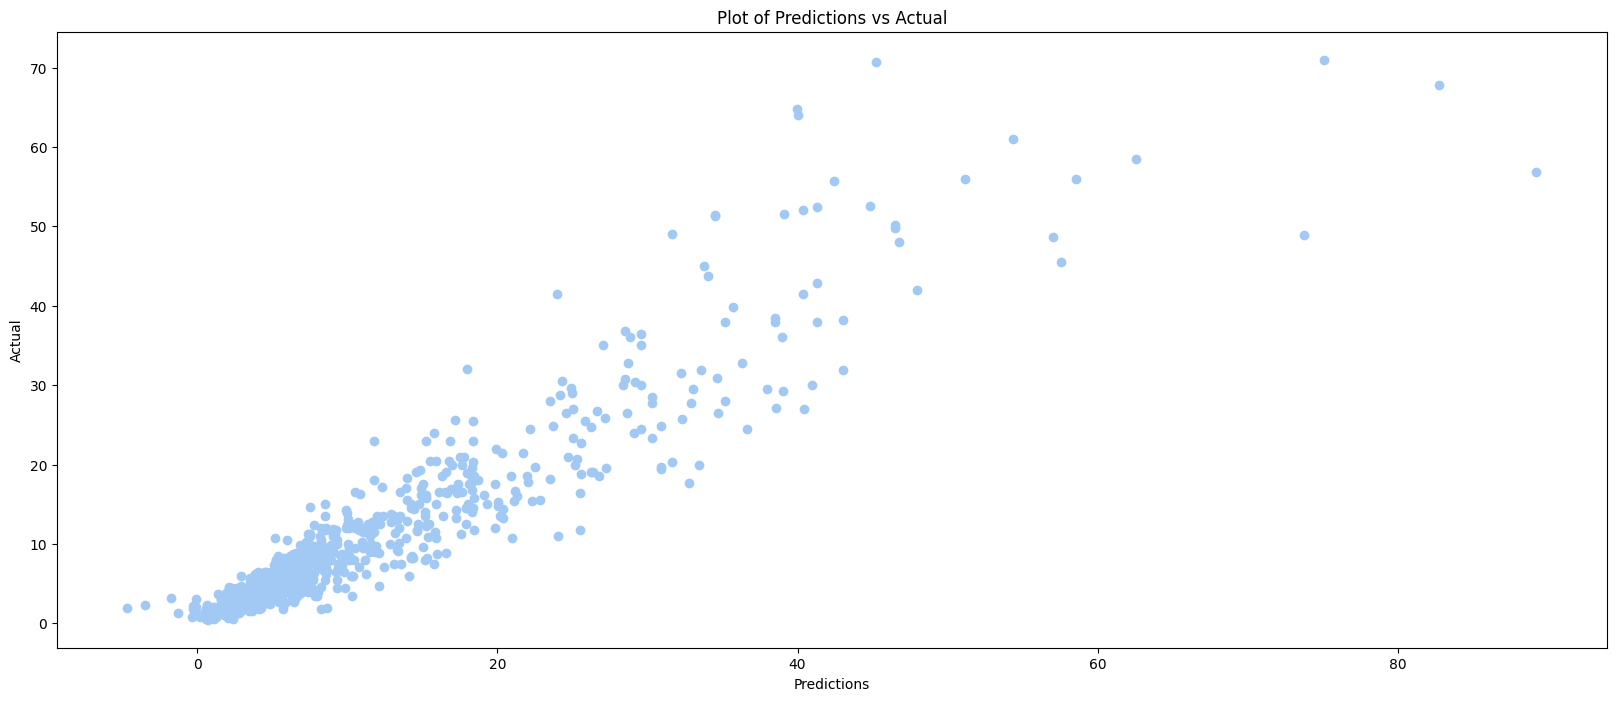

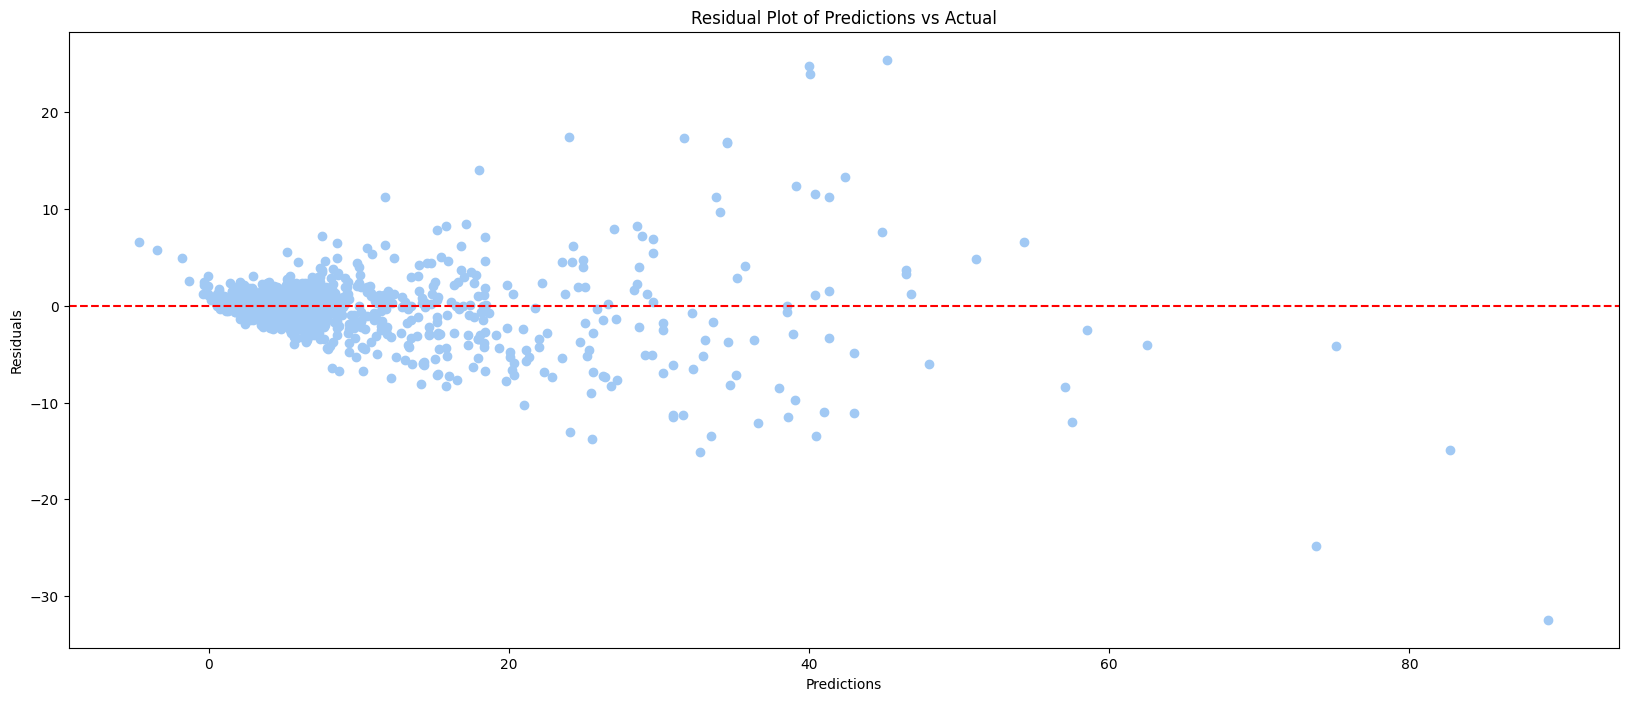

In [49]:
# Degree = 3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_test))
y_train_pred = lin_reg2.predict(poly_reg.fit_transform(X_train))

print(f'Coefficients: {lin_reg2.coef_}')
print(f'Intercept: {lin_reg2.intercept_}')
print()
evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Ridge Regression

Mean Absolute Error: 3.4530
Mean Squared Error: 27.5969
Root Mean Squared Error: 5.2533
R2-score test: 0.7202
R2-score train: 0.7050


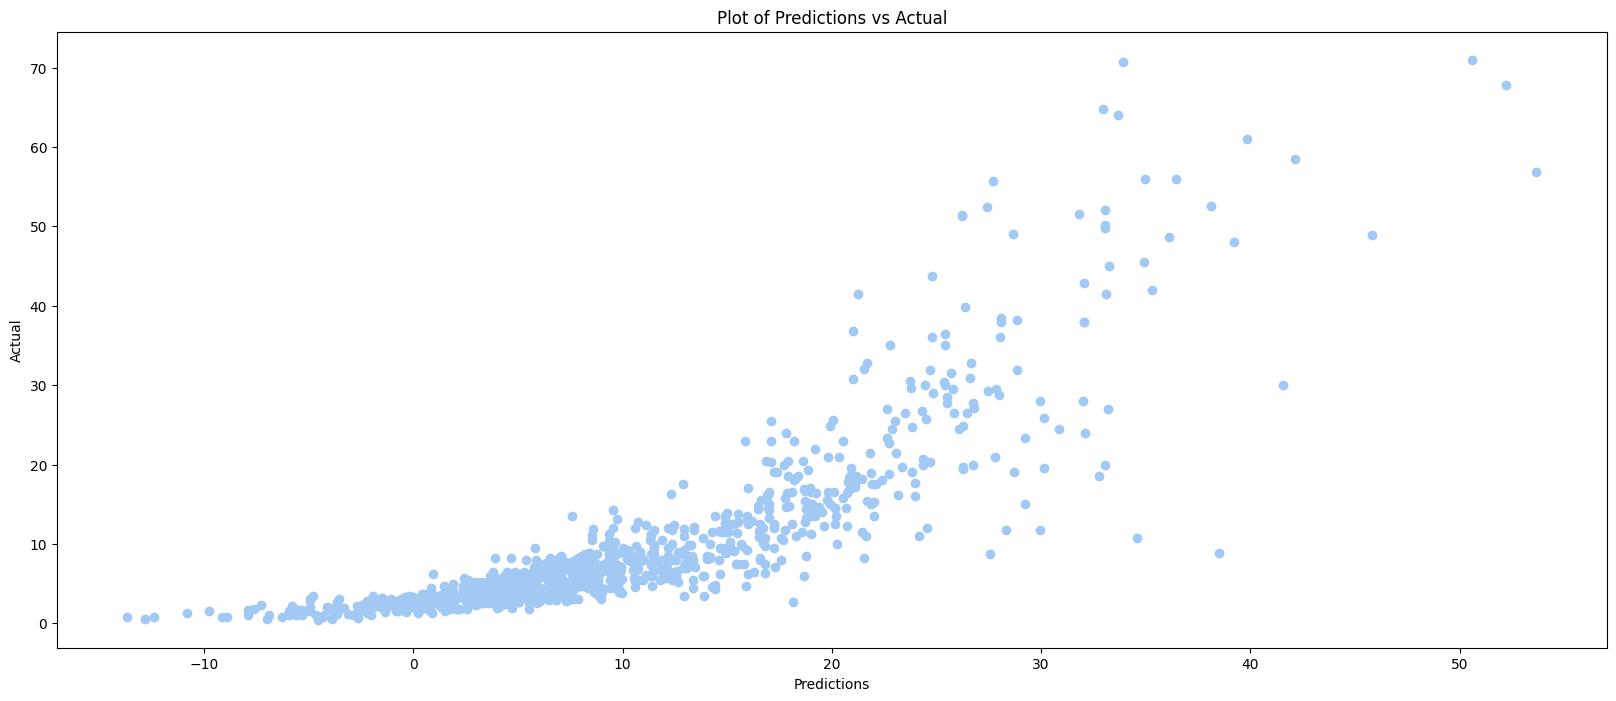

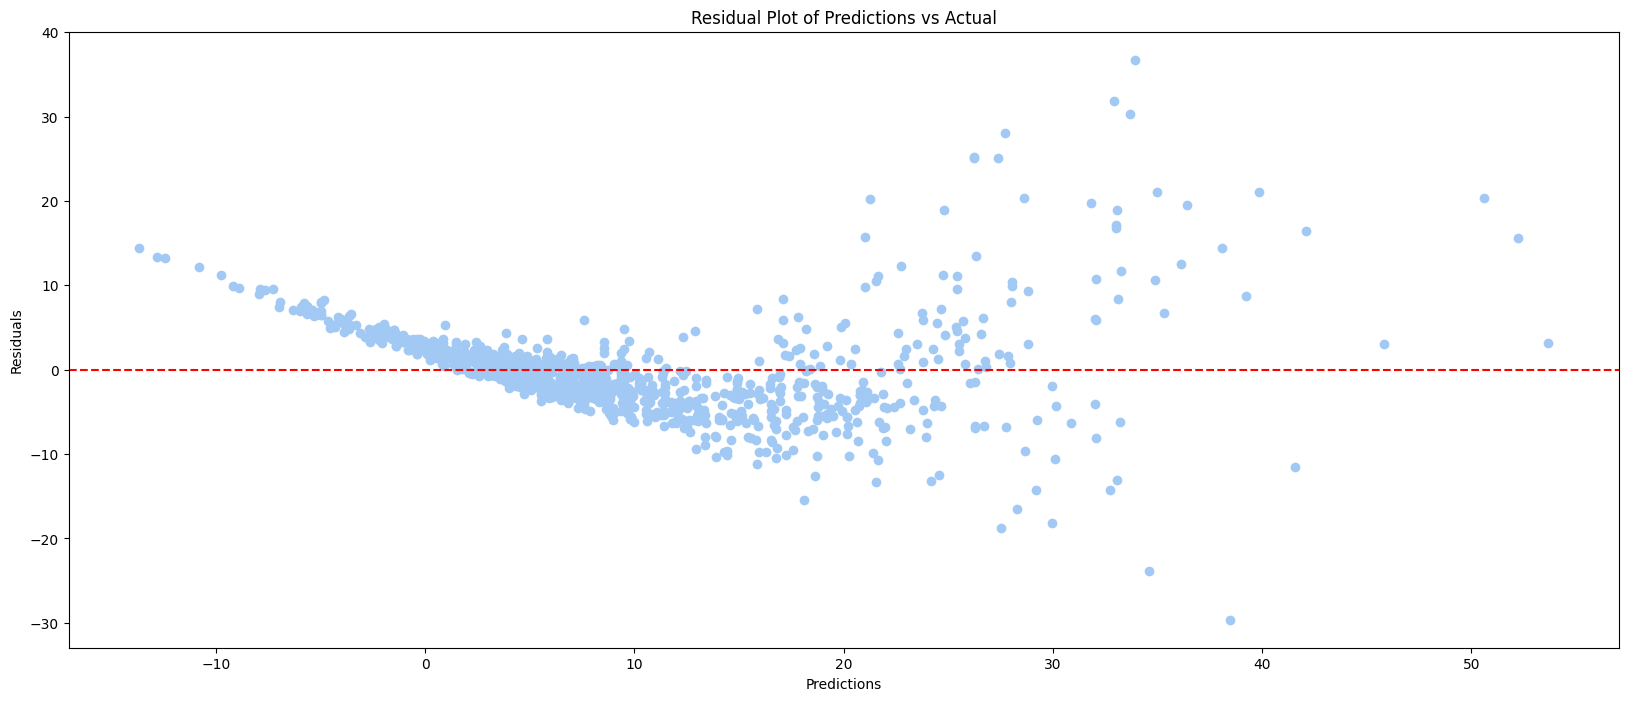

In [50]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Lasso Regression

Mean Absolute Error: 3.5149
Mean Squared Error: 28.9004
Root Mean Squared Error: 5.3759
R2-score test: 0.7069
R2-score train: 0.6918


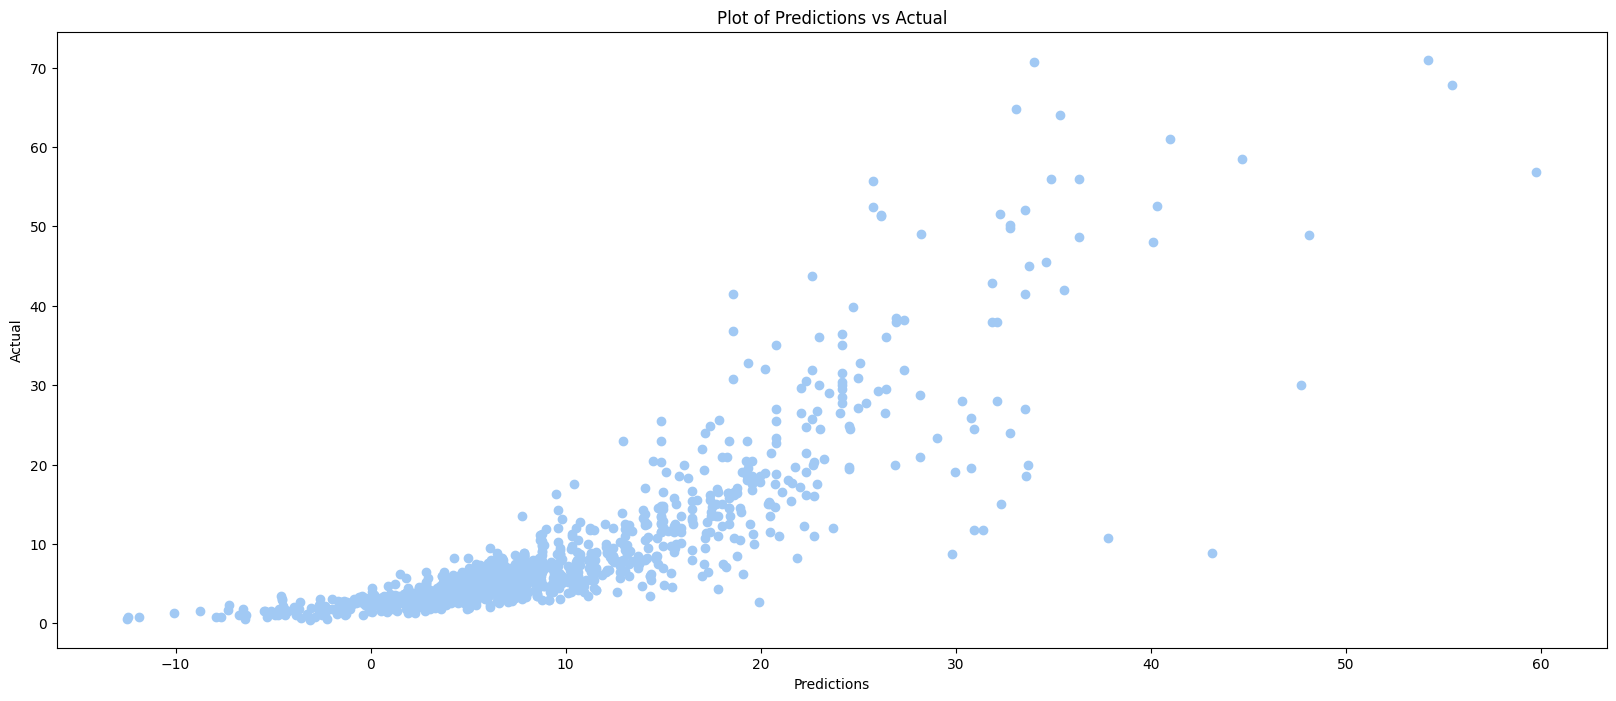

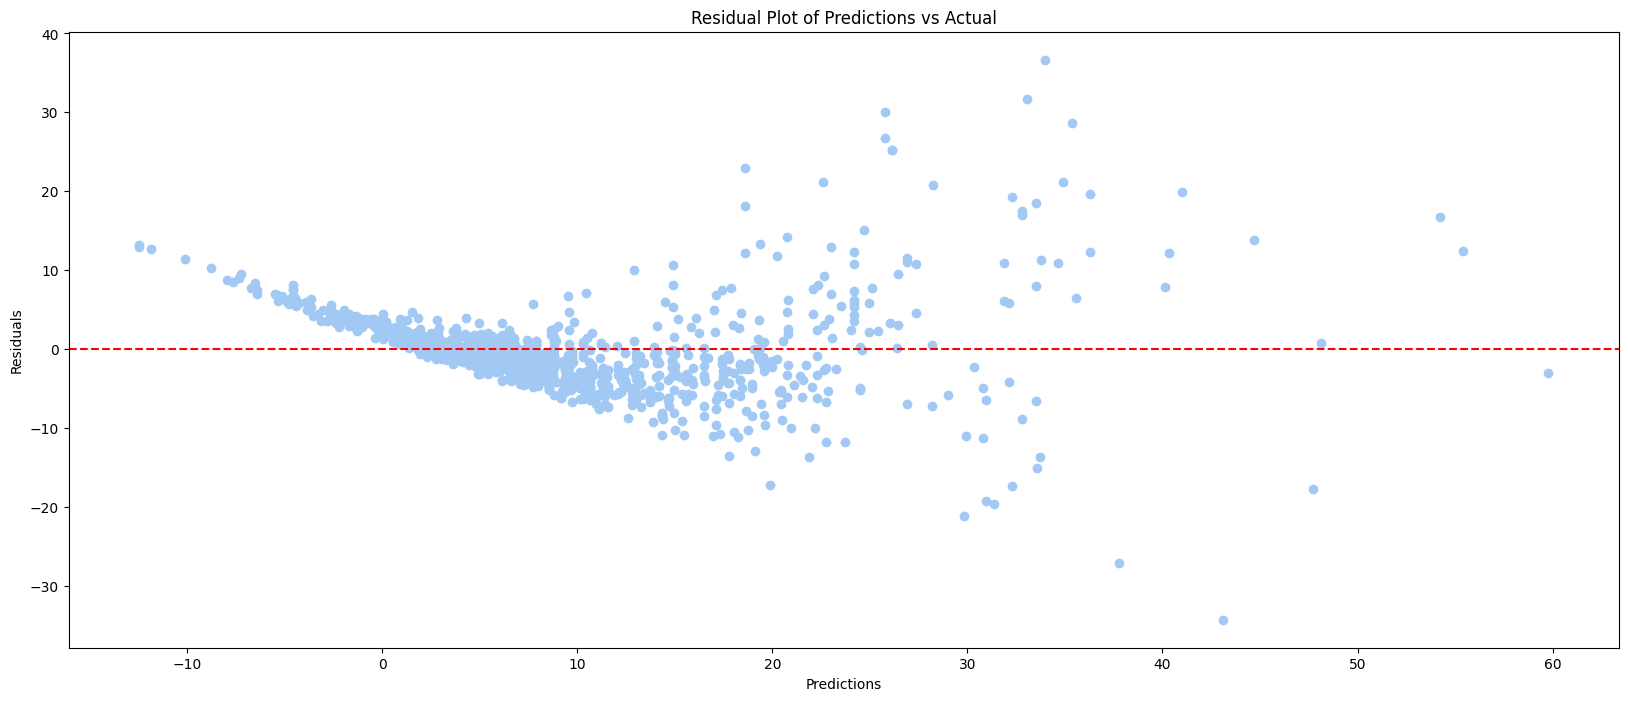

In [51]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = lasso_reg.predict(X_train)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Elastic-Net Regression

Mean Absolute Error: 3.4734
Mean Squared Error: 28.5686
Root Mean Squared Error: 5.3450
R2-score test: 0.7103
R2-score train: 0.6945


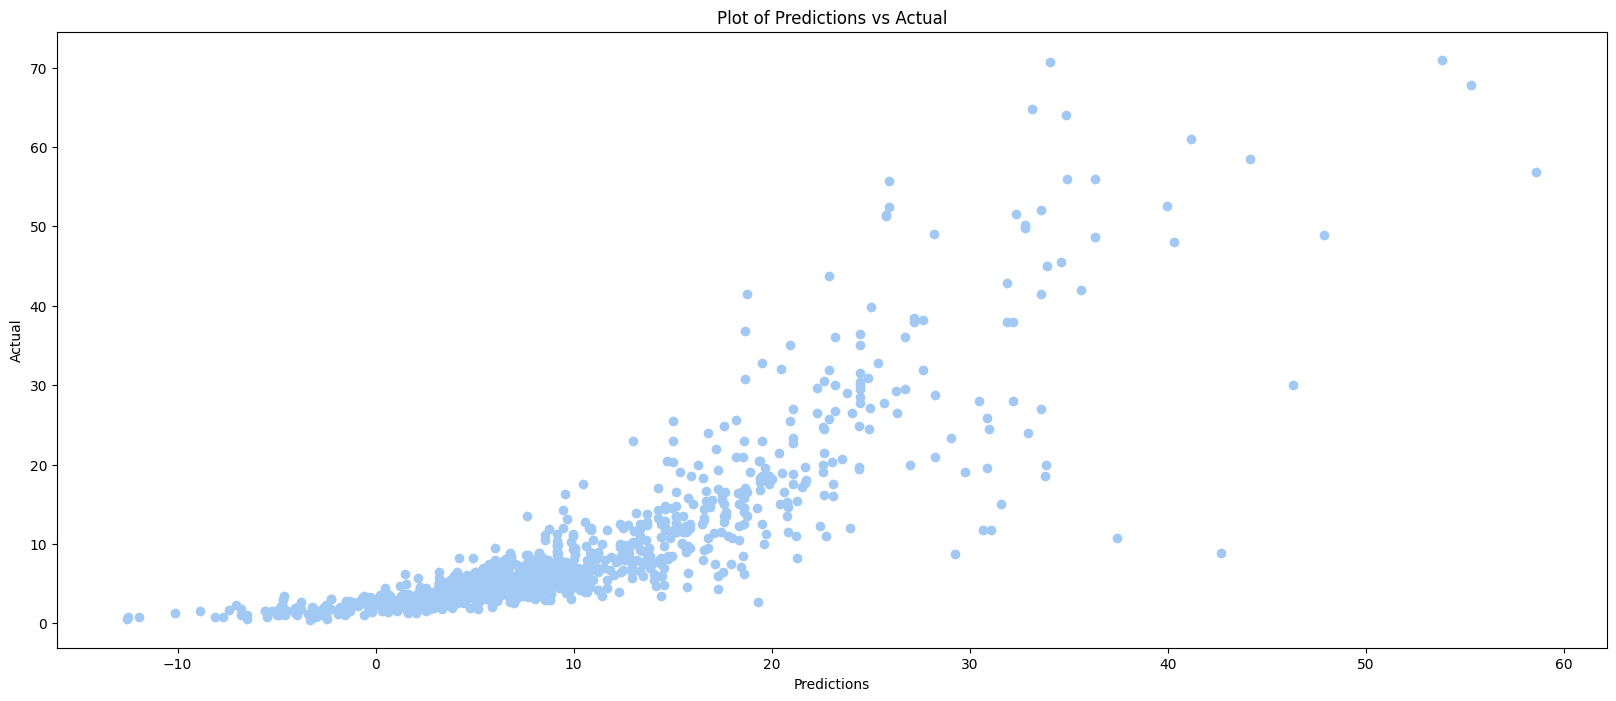

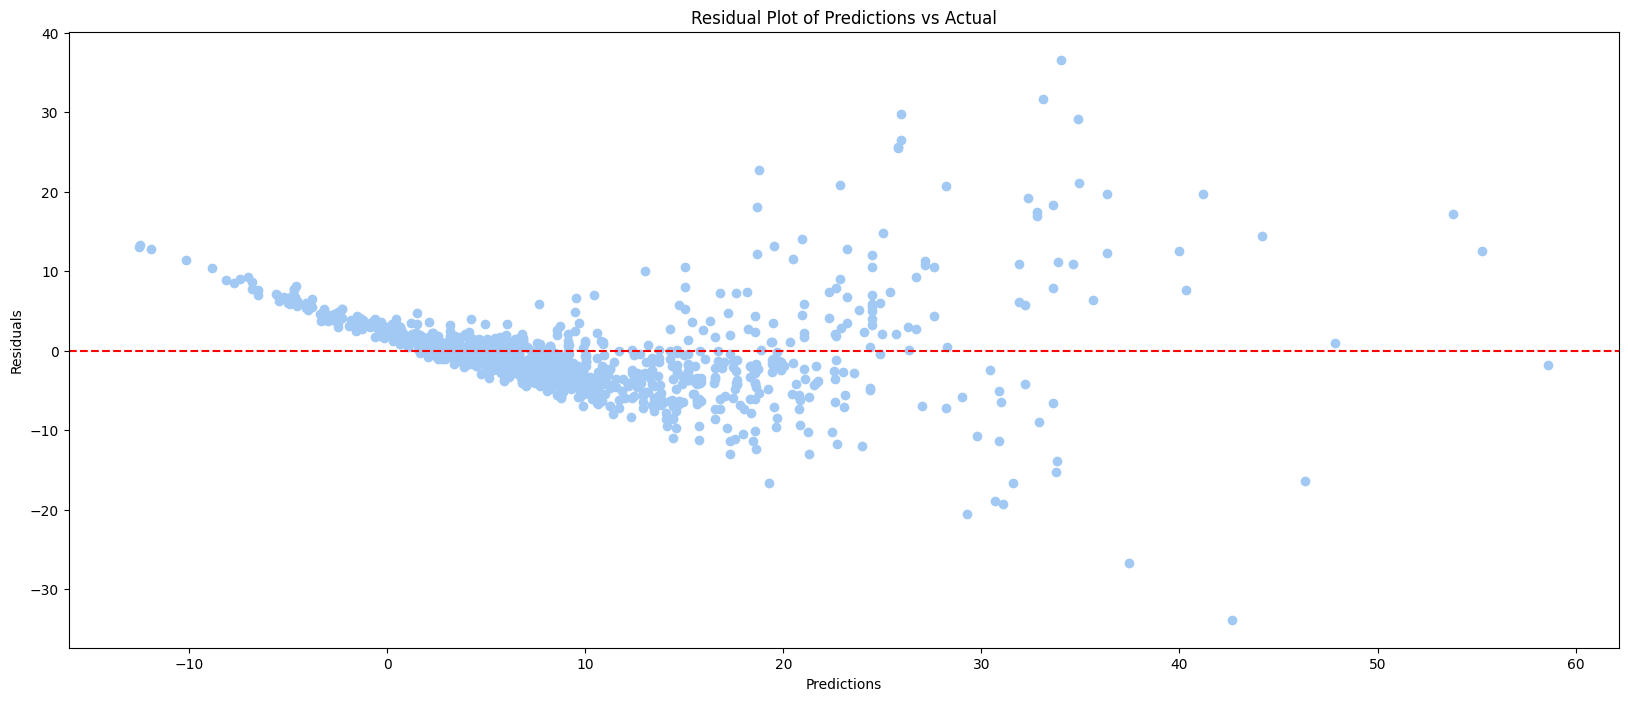

In [52]:
elastic_net_reg = ElasticNet()
elastic_net_reg.fit(X_train, y_train)
y_pred = elastic_net_reg.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = elastic_net_reg.predict(X_train)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Random Forest Regression

Mean Absolute Error: 1.4421
Mean Squared Error: 8.3831
Root Mean Squared Error: 2.8954
R2-score test: 0.9150
R2-score train: 0.9766


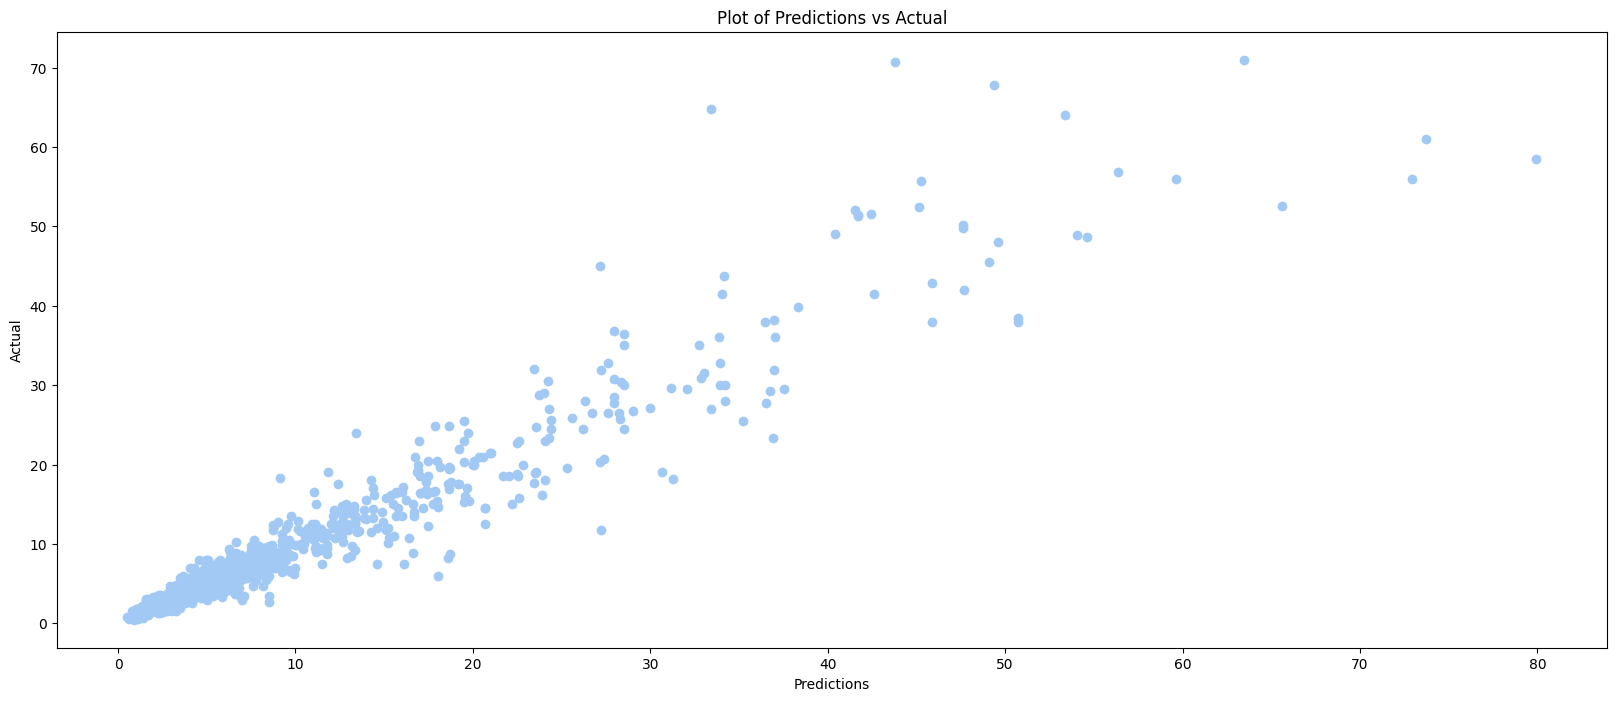

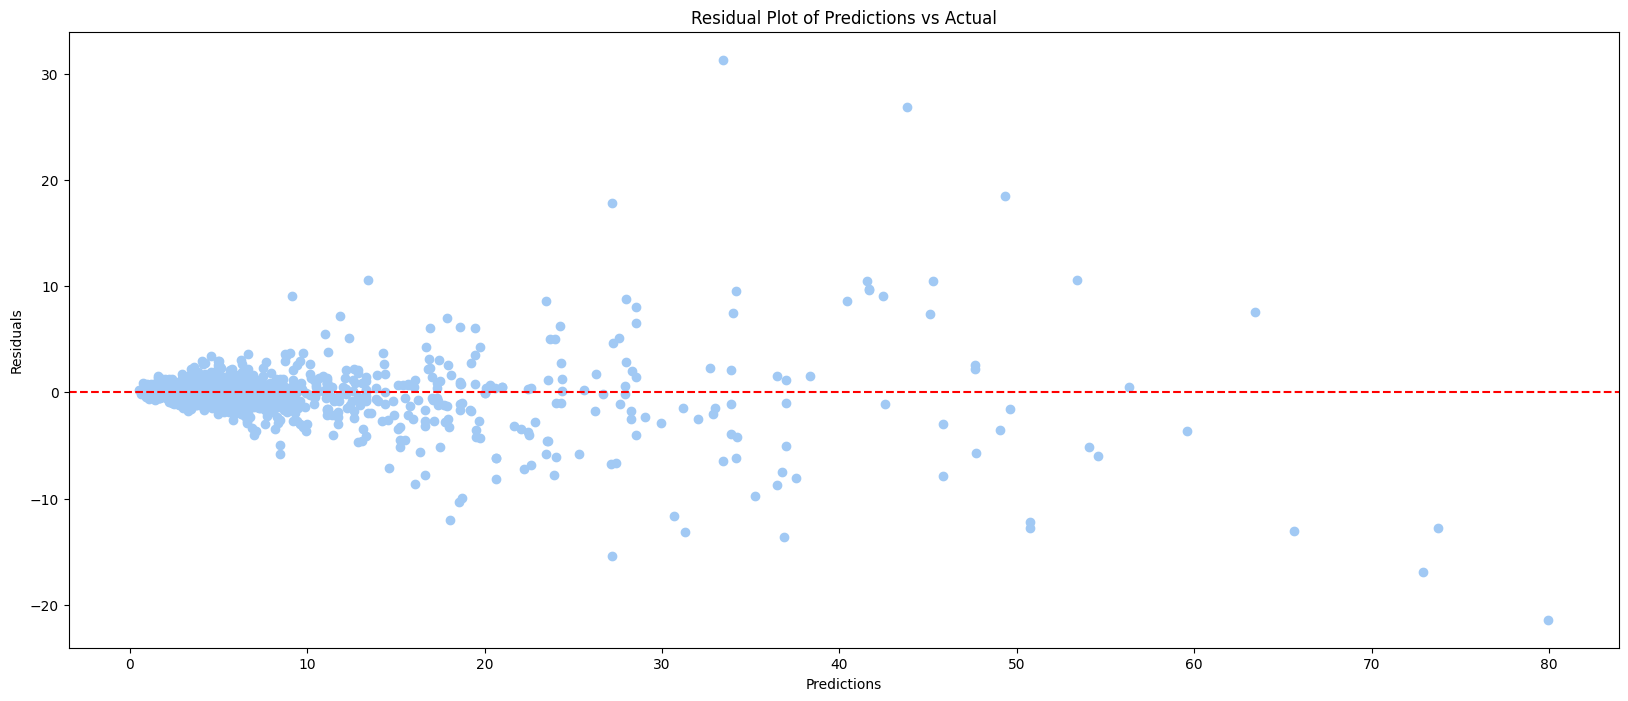

In [53]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train.values.ravel())
y_pred = random_forest_reg.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = random_forest_reg.predict(X_train)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Decision Tree Regression

Mean Absolute Error: 1.5873
Mean Squared Error: 10.5748
Root Mean Squared Error: 3.2519
R2-score test: 0.8928
R2-score train: 1.0000


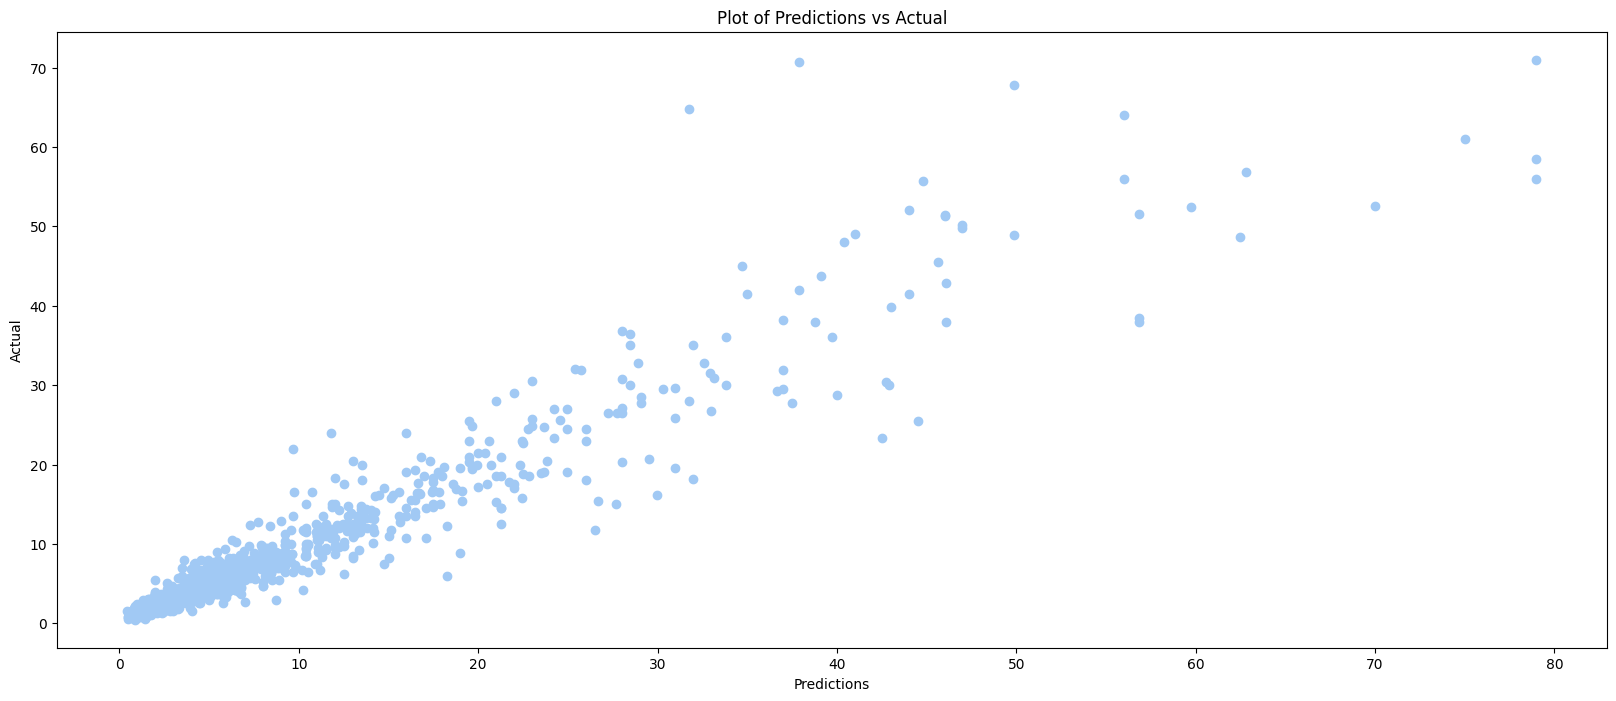

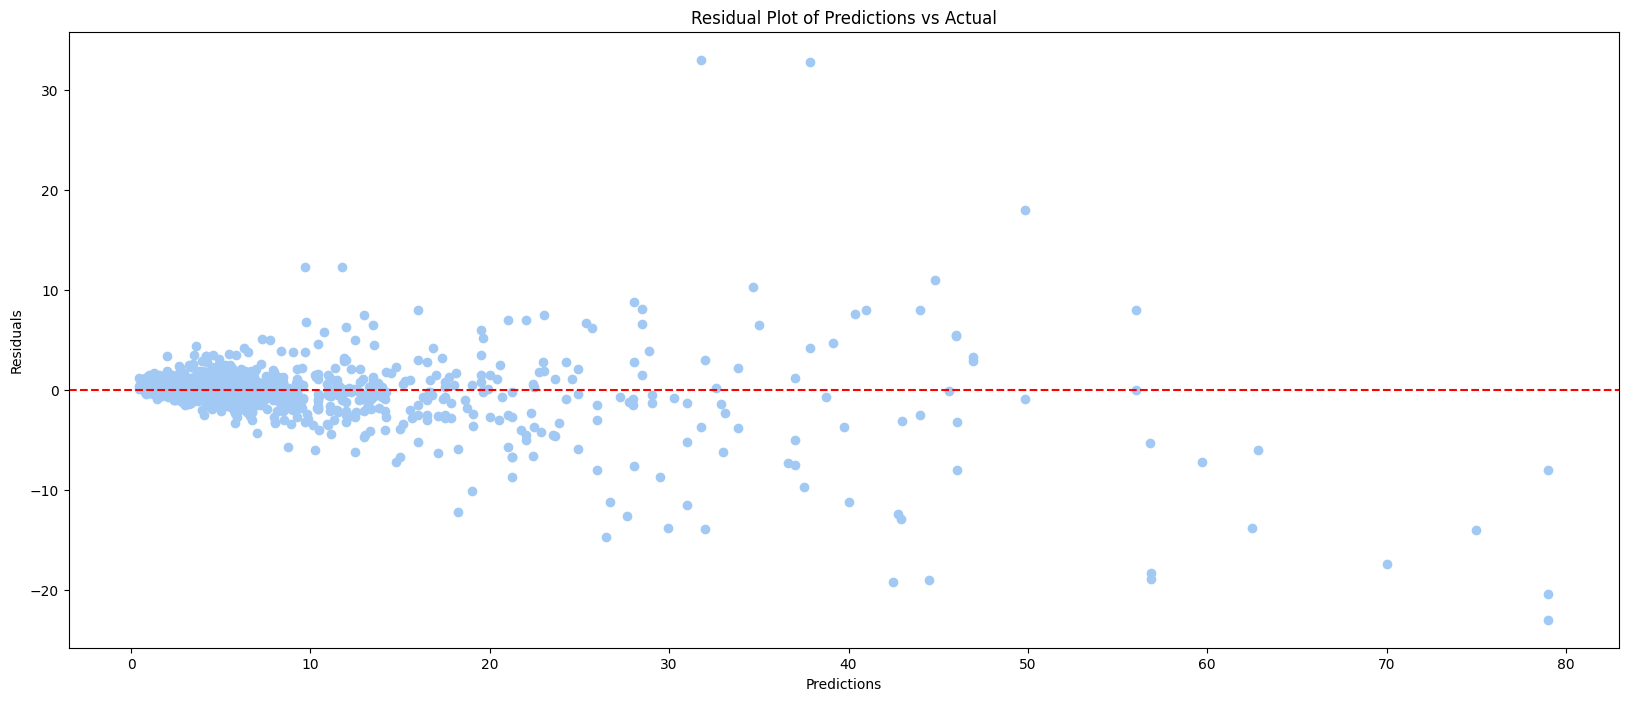

In [54]:
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X_train, y_train)
y_pred = dec_tree_reg.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = dec_tree_reg.predict(X_train)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train)
visualize(y_pred)
residual_plot(y_pred)

### Support Vector Regression

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_ravel = y_train.values.ravel()

Mean Absolute Error: 1.9690
Mean Squared Error: 18.7895
Root Mean Squared Error: 4.3347
R2-score test: 0.8095
R2-score train: 0.8080


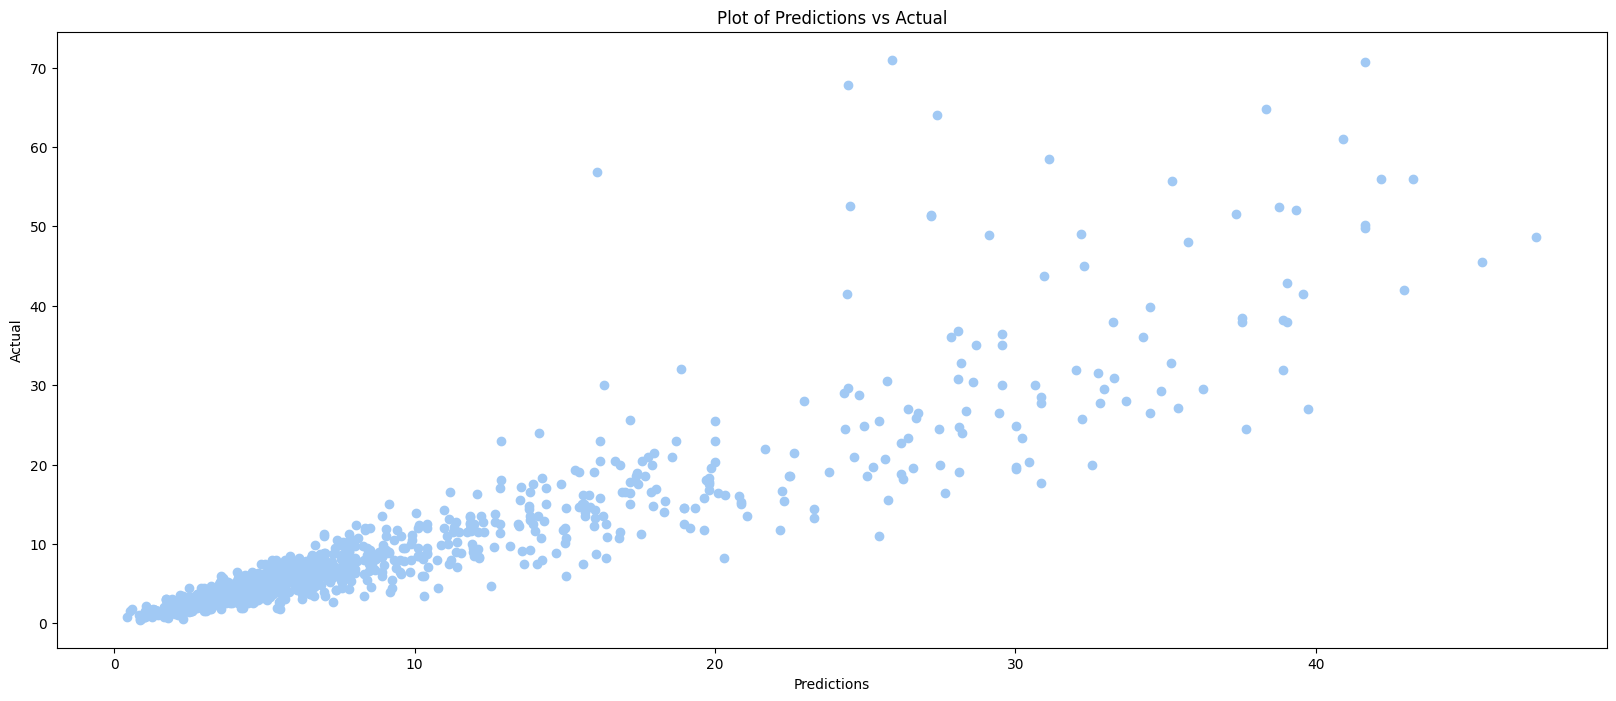

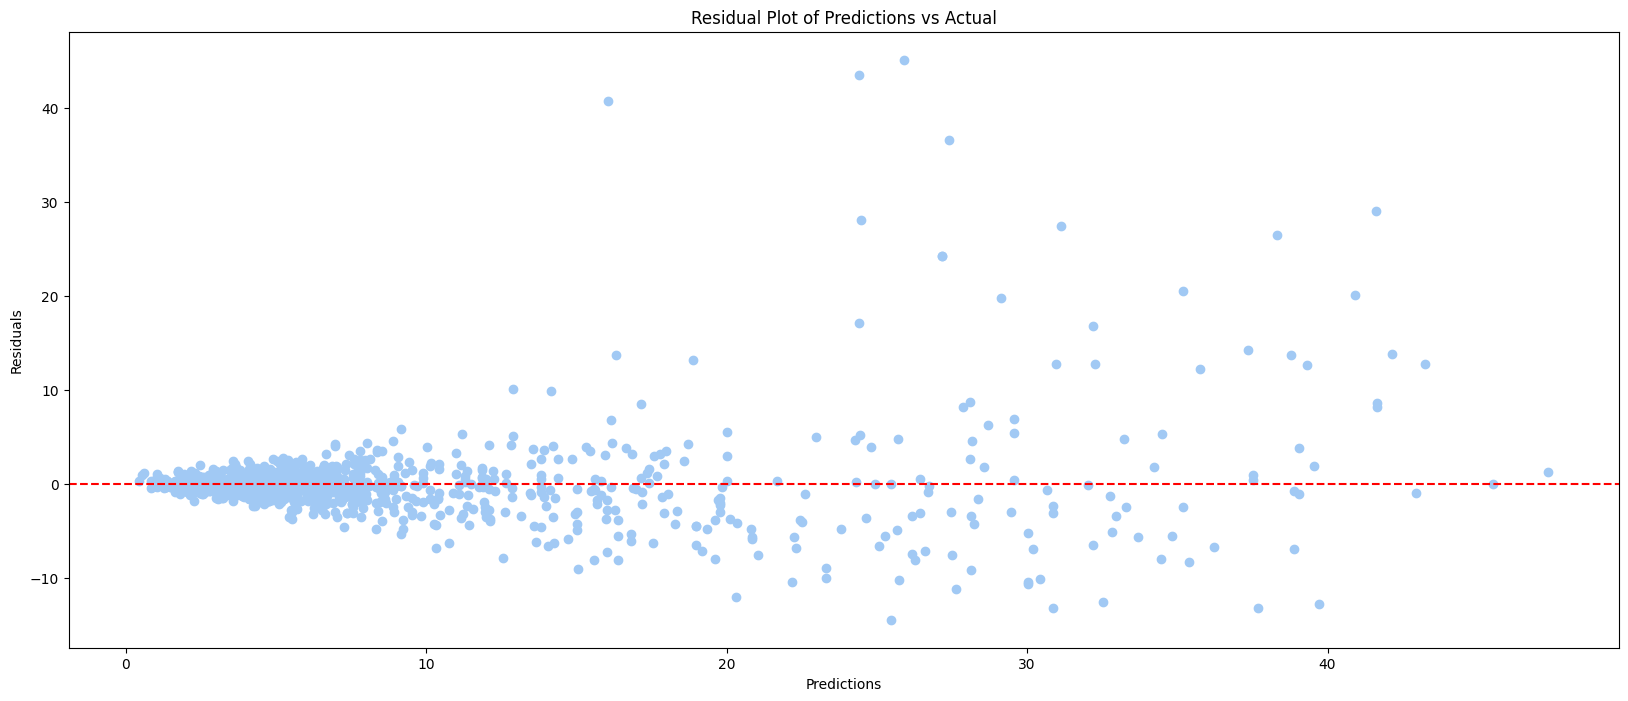

In [56]:
support_vector_reg = SVR(kernel='rbf')
support_vector_reg.fit(X_train_scaled, y_train_ravel)
y_pred = support_vector_reg.predict(X_test_scaled)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = support_vector_reg.predict(X_train_scaled)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

Mean Absolute Error: 2.2405
Mean Squared Error: 17.3403
Root Mean Squared Error: 4.1642
R2-score test: 0.8242
R2-score train: 0.8394


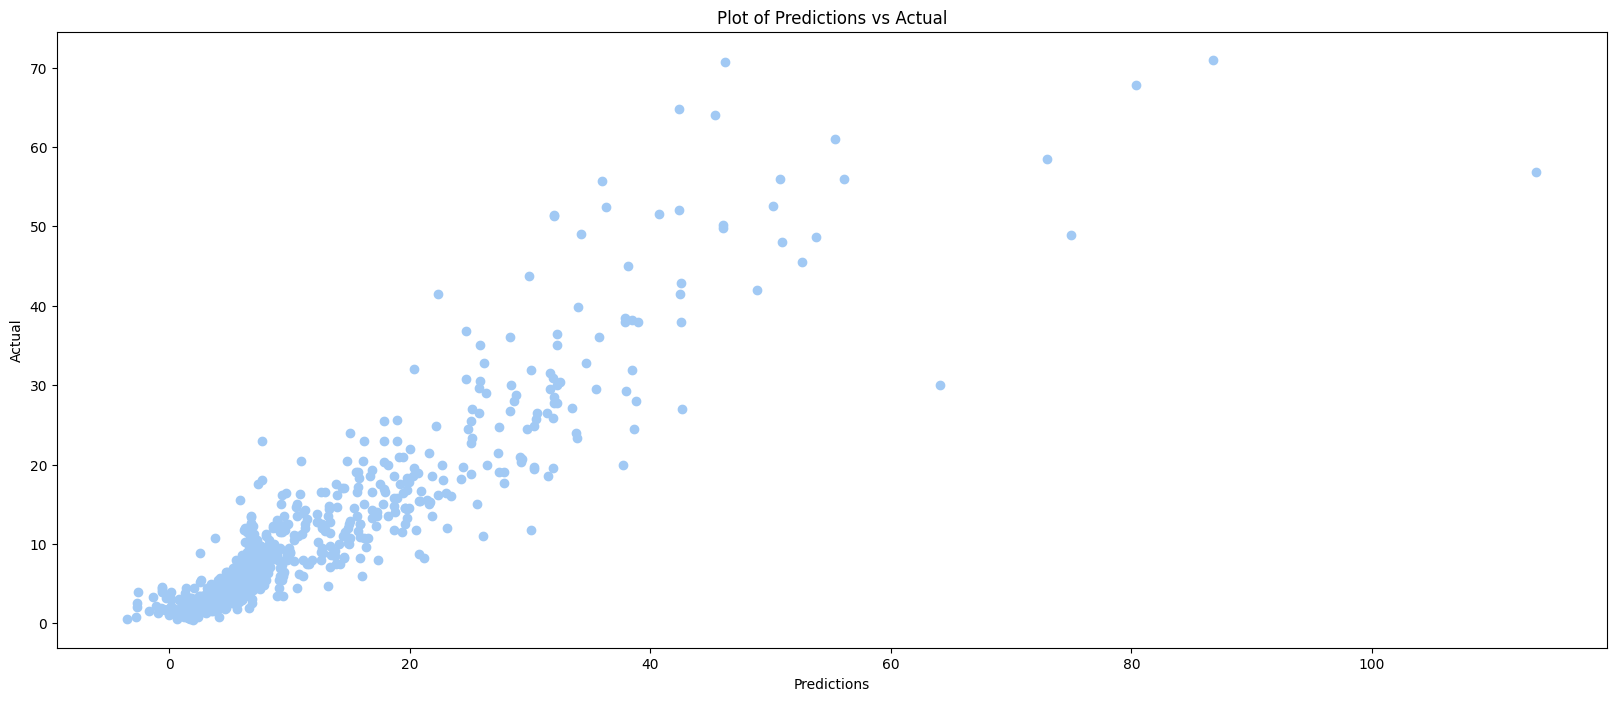

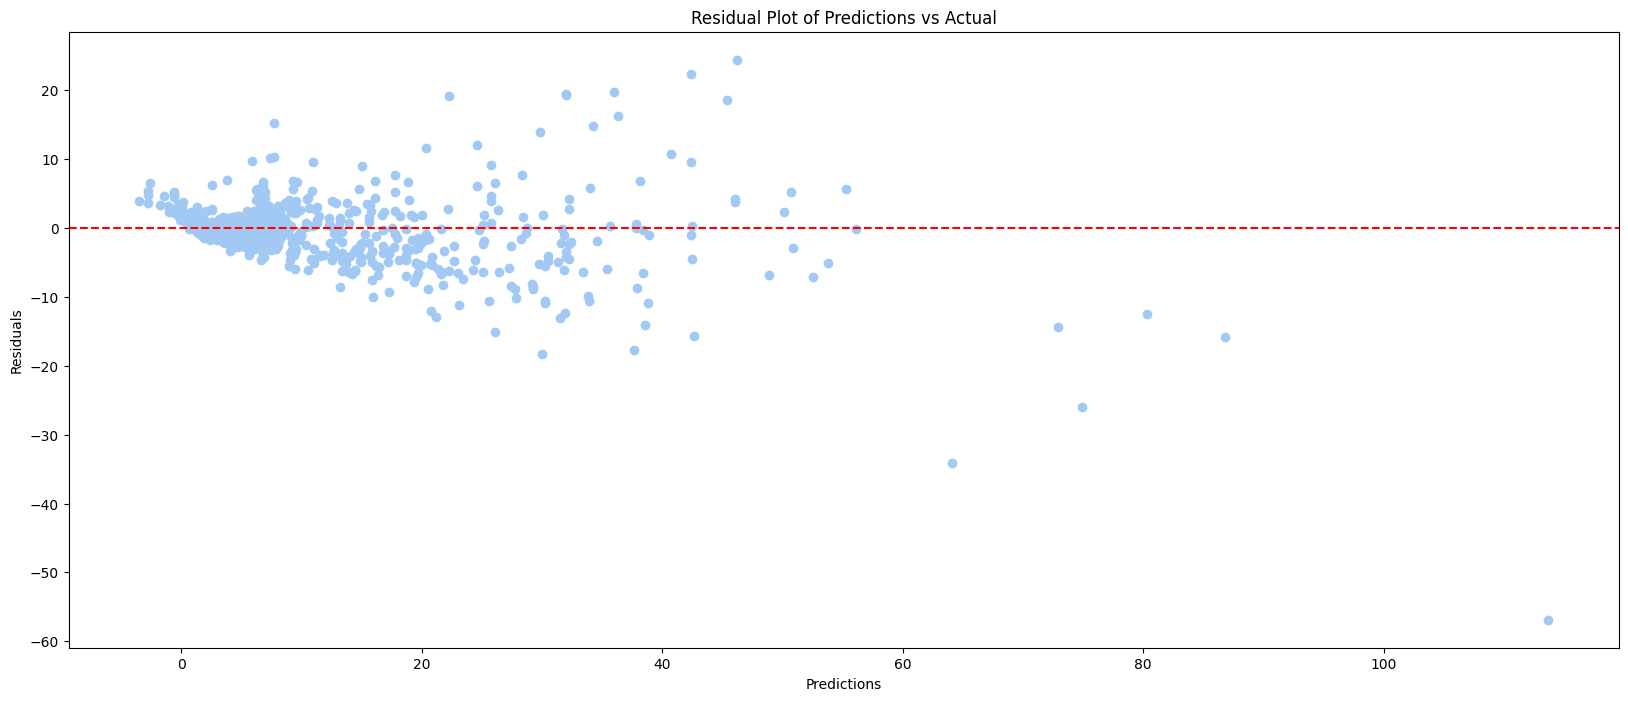

In [57]:
support_vector_reg = SVR(kernel='poly')
support_vector_reg.fit(X_train_scaled, y_train_ravel)
y_pred = support_vector_reg.predict(X_test_scaled)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = support_vector_reg.predict(X_train_scaled)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

Mean Absolute Error: 2.9672
Mean Squared Error: 31.2557
Root Mean Squared Error: 5.5907
R2-score test: 0.6830
R2-score train: 0.6367


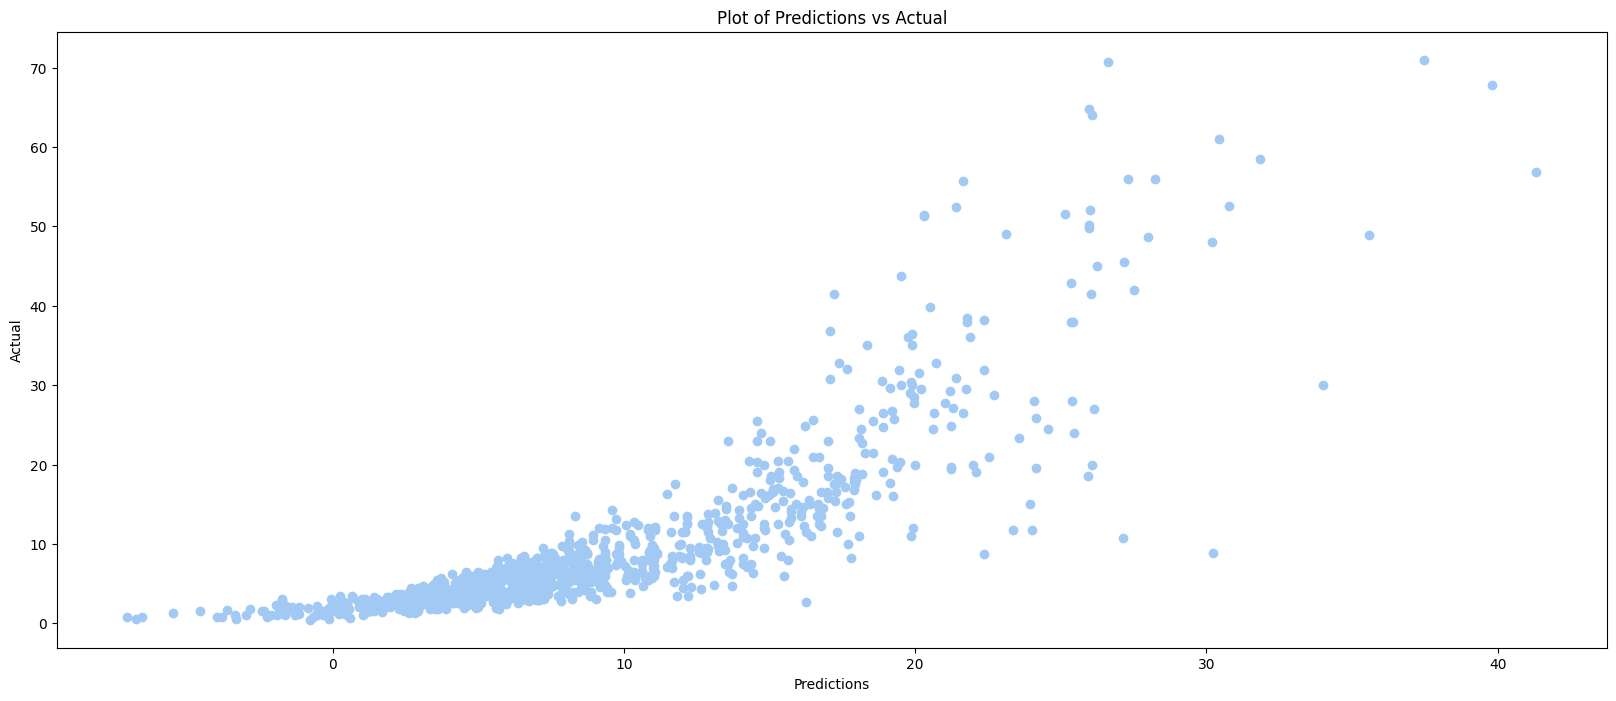

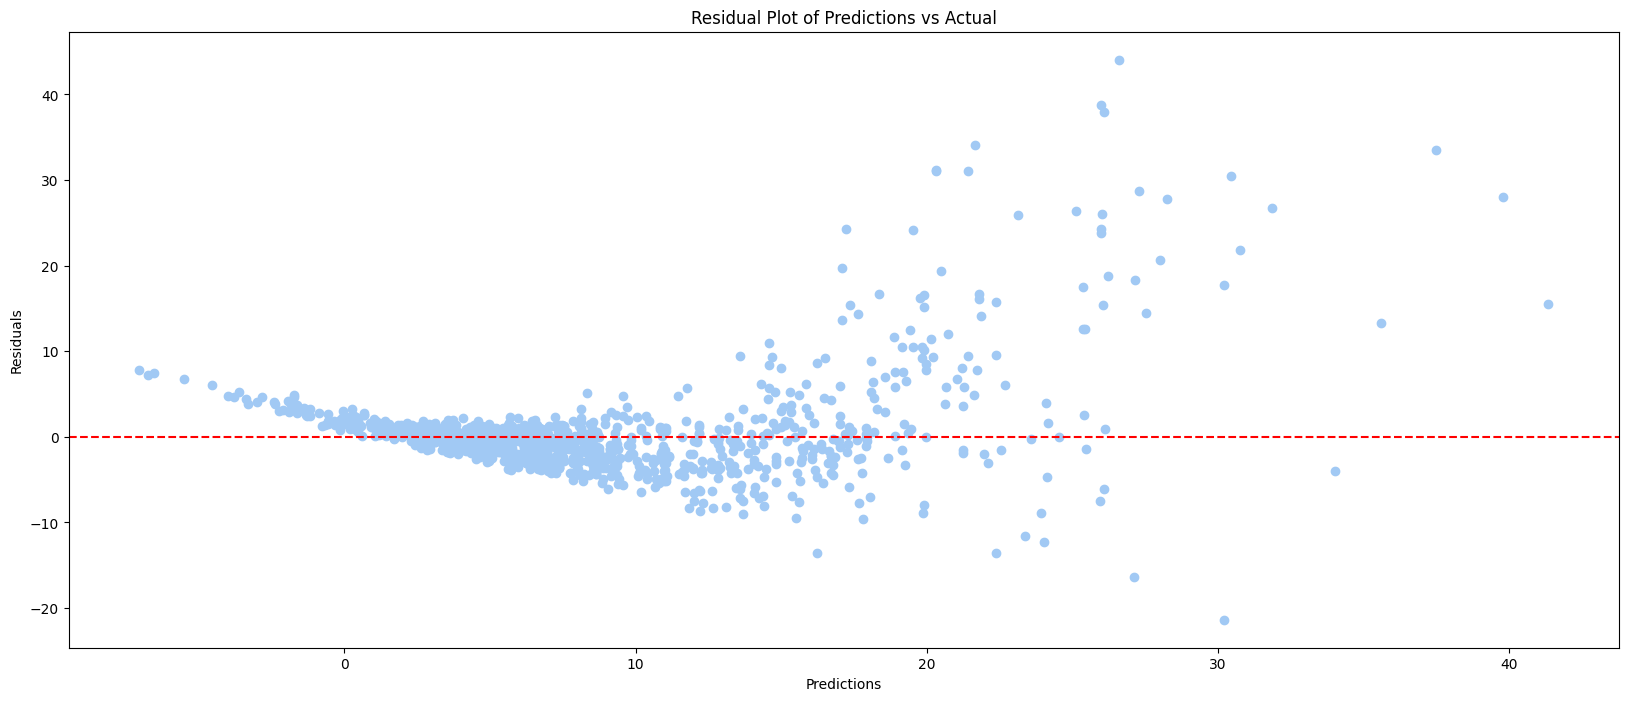

In [58]:
support_vector_reg = SVR(kernel='linear')
support_vector_reg.fit(X_train_scaled, y_train_ravel)
y_pred = support_vector_reg.predict(X_test_scaled)
y_pred = y_pred.reshape(len(y_pred), 1)
y_train_pred = support_vector_reg.predict(X_train_scaled)
y_train_pred = y_train_pred.reshape(len(y_train_pred), 1)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

### Artificial Neural Network

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 201.0575 - val_loss: 330078.5000
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.5905 - val_loss: 5422657.5000
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.7709 - val_loss: 27568364.0000
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.3358 - val_loss: 76617952.0000
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.4035 - val_loss: 130815200.0000
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.0681 - val_loss: 165519728.0000
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.7812 - val_loss: 193363680.0000
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.2602 - val_loss: 216168528.0000
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.6690 - val_loss: 238324640.0000
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1086 - val_loss: 262823632.0000
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.

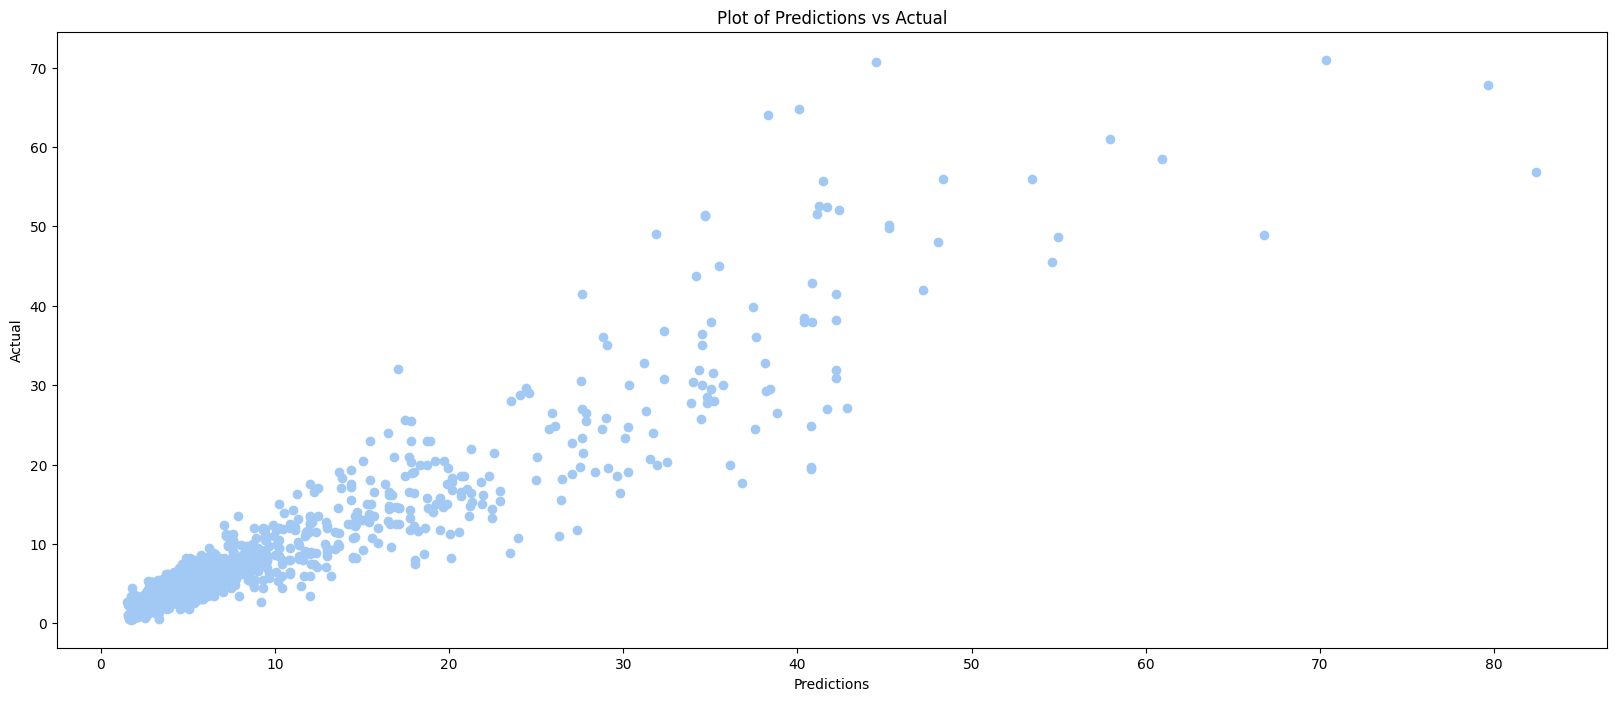

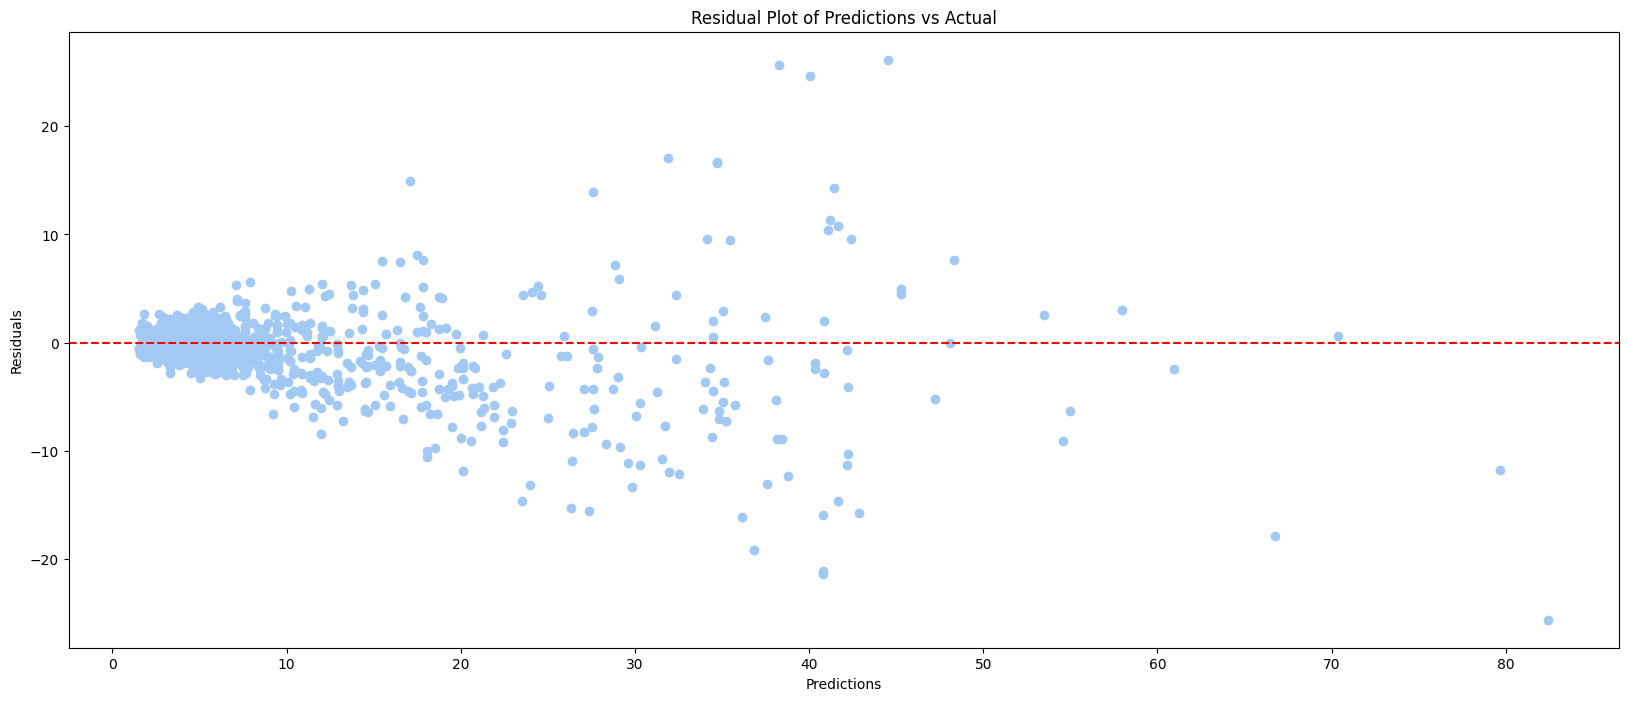

In [59]:
hidden_units1 = 6
hidden_units2 = 6
hidden_units3 = 1
ann = Sequential()

ann.add(Dense(units=hidden_units1, activation='relu'))
ann.add(Dense(units=hidden_units2, activation='relu'))
ann.add(Dense(units=hidden_units3, activation='relu'))

ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train_scaled, y_train_ravel, epochs=100, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test_scaled)
y_train_pred = ann.predict(X_train_scaled)

evaluate(y_pred, y_train_pred)
visualize(y_pred)
residual_plot(y_pred)

## Conclusion

In [60]:
model_names_list = ['Linear', 'Polynomial (degree=2)', 'Polynomial (degree=3)', 'Ridge', 'Lasso', 'Elastic-Net', 'Random Forest',
        'Decision Tree', 'Support Vector (rbf)', 'Support Vector (poly)', 'Support Vector (linear)', 'Artificial Neural Network']

scores = pd.DataFrame([model_names_list, mae_score_list, mse_score_list, rmse_score_list, r2_test_score_list, r2_train_score_list])
scores = scores.transpose()
scores.columns = ['Regression Model', 'Mean Absolute Error', 'Mean Squared Error',
                 'Root Mean Squared Error', 'R2-score test', 'R2-score train']

scores.sort_values(by=['R2-score test'], ascending=False).reset_index(drop=True)

,Regression Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2-score test,R2-score train
0,Random Forest,1.44211,8.383085,2.895356,0.91499,0.976631
1,Decision Tree,1.587273,10.574836,3.251897,0.892765,1.0
2,Polynomial (degree=3),1.934356,12.289986,3.505708,0.875372,0.875209
3,Polynomial (degree=2),2.161668,13.753709,3.708599,0.860529,0.853863
4,Artificial Neural Network,2.150394,14.302121,3.781815,0.854968,0.856388
5,Support Vector (poly),2.240511,17.340334,4.164173,0.824158,0.839416
6,Support Vector (rbf),1.969015,18.789542,4.334691,0.809463,0.807988
7,Ridge,3.452982,27.596937,5.253279,0.72015,0.704964
8,Linear,3.453002,27.597343,5.253317,0.720146,0.704964
9,Elastic-Net,3.473422,28.568599,5.34496,0.710297,0.694541


Berdasarkan pemodelan yang dilakukan, model dengan performa terbaik adalah Random Forest karena memiliki nilai R2-score yang paling tinggi serta error yang terkecil. Walaupun demikian, besar R2-score testing dengan data training memiliki jarak yang cukup signifikan.